# 1. Introduction


**Feture of Data**
1. Item_identifier = รหัสสินค้า
2. Item_weight = น้ำหนักสินค้า
3. Item_fat_content = สินค้าประเภทไขมันน้อยหรือไม่
4. Item_visibility = % การมองเห็น
5. Item_type = ประเภทสินค้า
6. Item_MRP = Maximum Retail Price ราคาขายปลีกที่สูงที่สุด
7. Outlet_identifier = รหัสสาขา
8. Outlet_establishment_year = ปีที่สาขาก่อตั้ง
9. Outlet_size = ขนาดสาขา
10. Outlet_Location_Type = ประเภทของเมืองที่สาขานั้นอยู่
11. Outlet_Type = ประเภทของสาขา
12. Item_outlet_sales = ยอดขายของสินค้าชนิดนั้นในสาขานั้น (Target)


# 2. Library Importing

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#config notebook
%config InlineBackend.figure_format ='retina'
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
#function 
def figure_size (width, height) :
  return plt.figure(figsize=(width, height))

# 3. Data Loading

1. โหลด csv เข้าไปใน Python Pandas


In [ ]:
def load_data_csv(path):
  dataframe = pd.read_csv(path)
  return dataframe
df  = load_data_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/BIG%20MART%20SALES%20PREDICTION/Train.csv')

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว


In [ ]:
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [ ]:
df.tail(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8513           FDH31       12.000          Regular         0.020407   
8514           FDA01       15.000          Regular         0.054489   
8515           FDH24       20.700          Low Fat         0.021518   
8516           NCJ19       18.600          Low Fat         0.118661   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8513                Meat   99.9042            OUT035   
8514              Canned   57.5904            OUT045   
8515        Baking Goods  157.5288            OUT018   
8516              Others   58.7588            OUT018   
8517        Frozen Foods  178.8318            OUT046   
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8513                       2004       Small               Tier 2   
8514                       2002         NaN               Tier 2   
8515                       2009      Medium               Tier 3   
8516                       2009      Medium               Tier 3   
8517                       1997       Small               Tier 1   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8513  Supermarket Type1           595.2252  
8514  Supermarket Type1           468.7232  
8515  Supermarket Type2          1571.2880  
8516  Supermarket Type2           858.8820  
8517  Supermarket Type1          3608.6360  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [ ]:
df.sample(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
2150           FDD05       19.350          Low Fat         0.016637   
6337           FDK44          NaN          Low Fat         0.121636   
7898           FDL58        5.780          Regular         0.124110   
6089           DRM47        9.300          Low Fat         0.043964   
6822           FDX09        9.000          Low Fat         0.065351   
35             NCX29       10.000          Low Fat         0.089291   
2694           FDS26       20.350          Low Fat         0.089608   
623            FDY59        8.195          Low Fat         0.000000   
2524           FDJ04       18.000          Low Fat         0.124452   
2563           FDV21          NaN          Low Fat         0.170254   

                  Item_Type  Item_MRP Outlet_Identifier  \
2150           Frozen Foods  120.9098            OUT049   
6337  Fruits and Vegetables  175.4738            OUT027   
7898            Snack Foods  262.3568            OUT010   
6089            Hard Drinks  192.3846            OUT018   
6822            Snack Foods  175.4370            OUT049   
35       Health and Hygiene  146.7102            OUT049   
2694                  Dairy  262.1594            OUT049   
623            Baking Goods   93.1462            OUT018   
2524           Frozen Foods  118.5124            OUT046   
2563            Snack Foods  124.8704            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
2150                       1999      Medium               Tier 1   
6337                       1985      Medium               Tier 3   
7898                       1998         NaN               Tier 3   
6089                       2009      Medium               Tier 3   
6822                       1999      Medium               Tier 1   
35                         1999      Medium               Tier 1   
2694                       1999      Medium               Tier 1   
623                        2009      Medium               Tier 3   
2524                       1997       Small               Tier 1   
2563                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
2150  Supermarket Type1          1687.1372  
6337  Supermarket Type3          2954.1546  
7898      Grocery Store           790.9704  
6089  Supermarket Type2          4586.0304  
6822  Supermarket Type1          3175.8660  
35    Supermarket Type1          3791.0652  
2694  Supermarket Type1          3139.9128  
623   Supermarket Type2           647.8234  
2524  Supermarket Type1          1303.6364  
2563  Supermarket Type3          2127.8968

3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
df.sample(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
2260           FDN02       16.500          Low Fat         0.073977   
5413           FDA15        9.300          Low Fat         0.016009   
3426           NCL29        9.695          Low Fat         0.114584   
5369           FDN40        5.880          Low Fat         0.000000   
7825           FDT25        7.500          Low Fat         0.050958   
5358           FDY56       16.350          Regular         0.062359   
8482           FDZ28       20.000          Regular         0.051702   
4493           FDA07          NaN          Regular         0.030795   
386            FDC50       15.850          Low Fat         0.000000   
4085           FDY04       17.700          Regular         0.042542   

                  Item_Type  Item_MRP Outlet_Identifier  \
2260                 Canned  206.8638            OUT045   
5413                  Dairy  250.6092            OUT013   
3426     Health and Hygiene  156.4604            OUT017   
5369           Frozen Foods  154.2998            OUT046   
7825                 Canned  122.4072            OUT018   
5358  Fruits and Vegetables  224.0062            OUT013   
8482           Frozen Foods  125.8678            OUT018   
4493  Fruits and Vegetables  122.9072            OUT027   
386                  Canned   96.4094            OUT035   
4085           Frozen Foods  161.9210            OUT049   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
2260                       2002         NaN               Tier 2   
5413                       1987        High               Tier 3   
3426                       2007         NaN               Tier 2   
5369                       1997       Small               Tier 1   
7825                       2009      Medium               Tier 3   
5358                       1987        High               Tier 3   
8482                       2009      Medium               Tier 3   
4493                       1985      Medium               Tier 3   
386                        2004       Small               Tier 2   
4085                       1999      Medium               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
2260  Supermarket Type1          2070.6380  
5413  Supermarket Type1          6474.2392  
3426  Supermarket Type1          2535.3664  
5369  Supermarket Type1          1999.3974  
7825  Supermarket Type2          2572.6512  
5358  Supermarket Type1          4288.4178  
8482  Supermarket Type2           763.0068  
4493  Supermarket Type3          4532.7664  
386   Supermarket Type1          1237.7222  
4085  Supermarket Type1          2120.5730

4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น


In [ ]:
features = df.columns.tolist()

In [ ]:
features

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

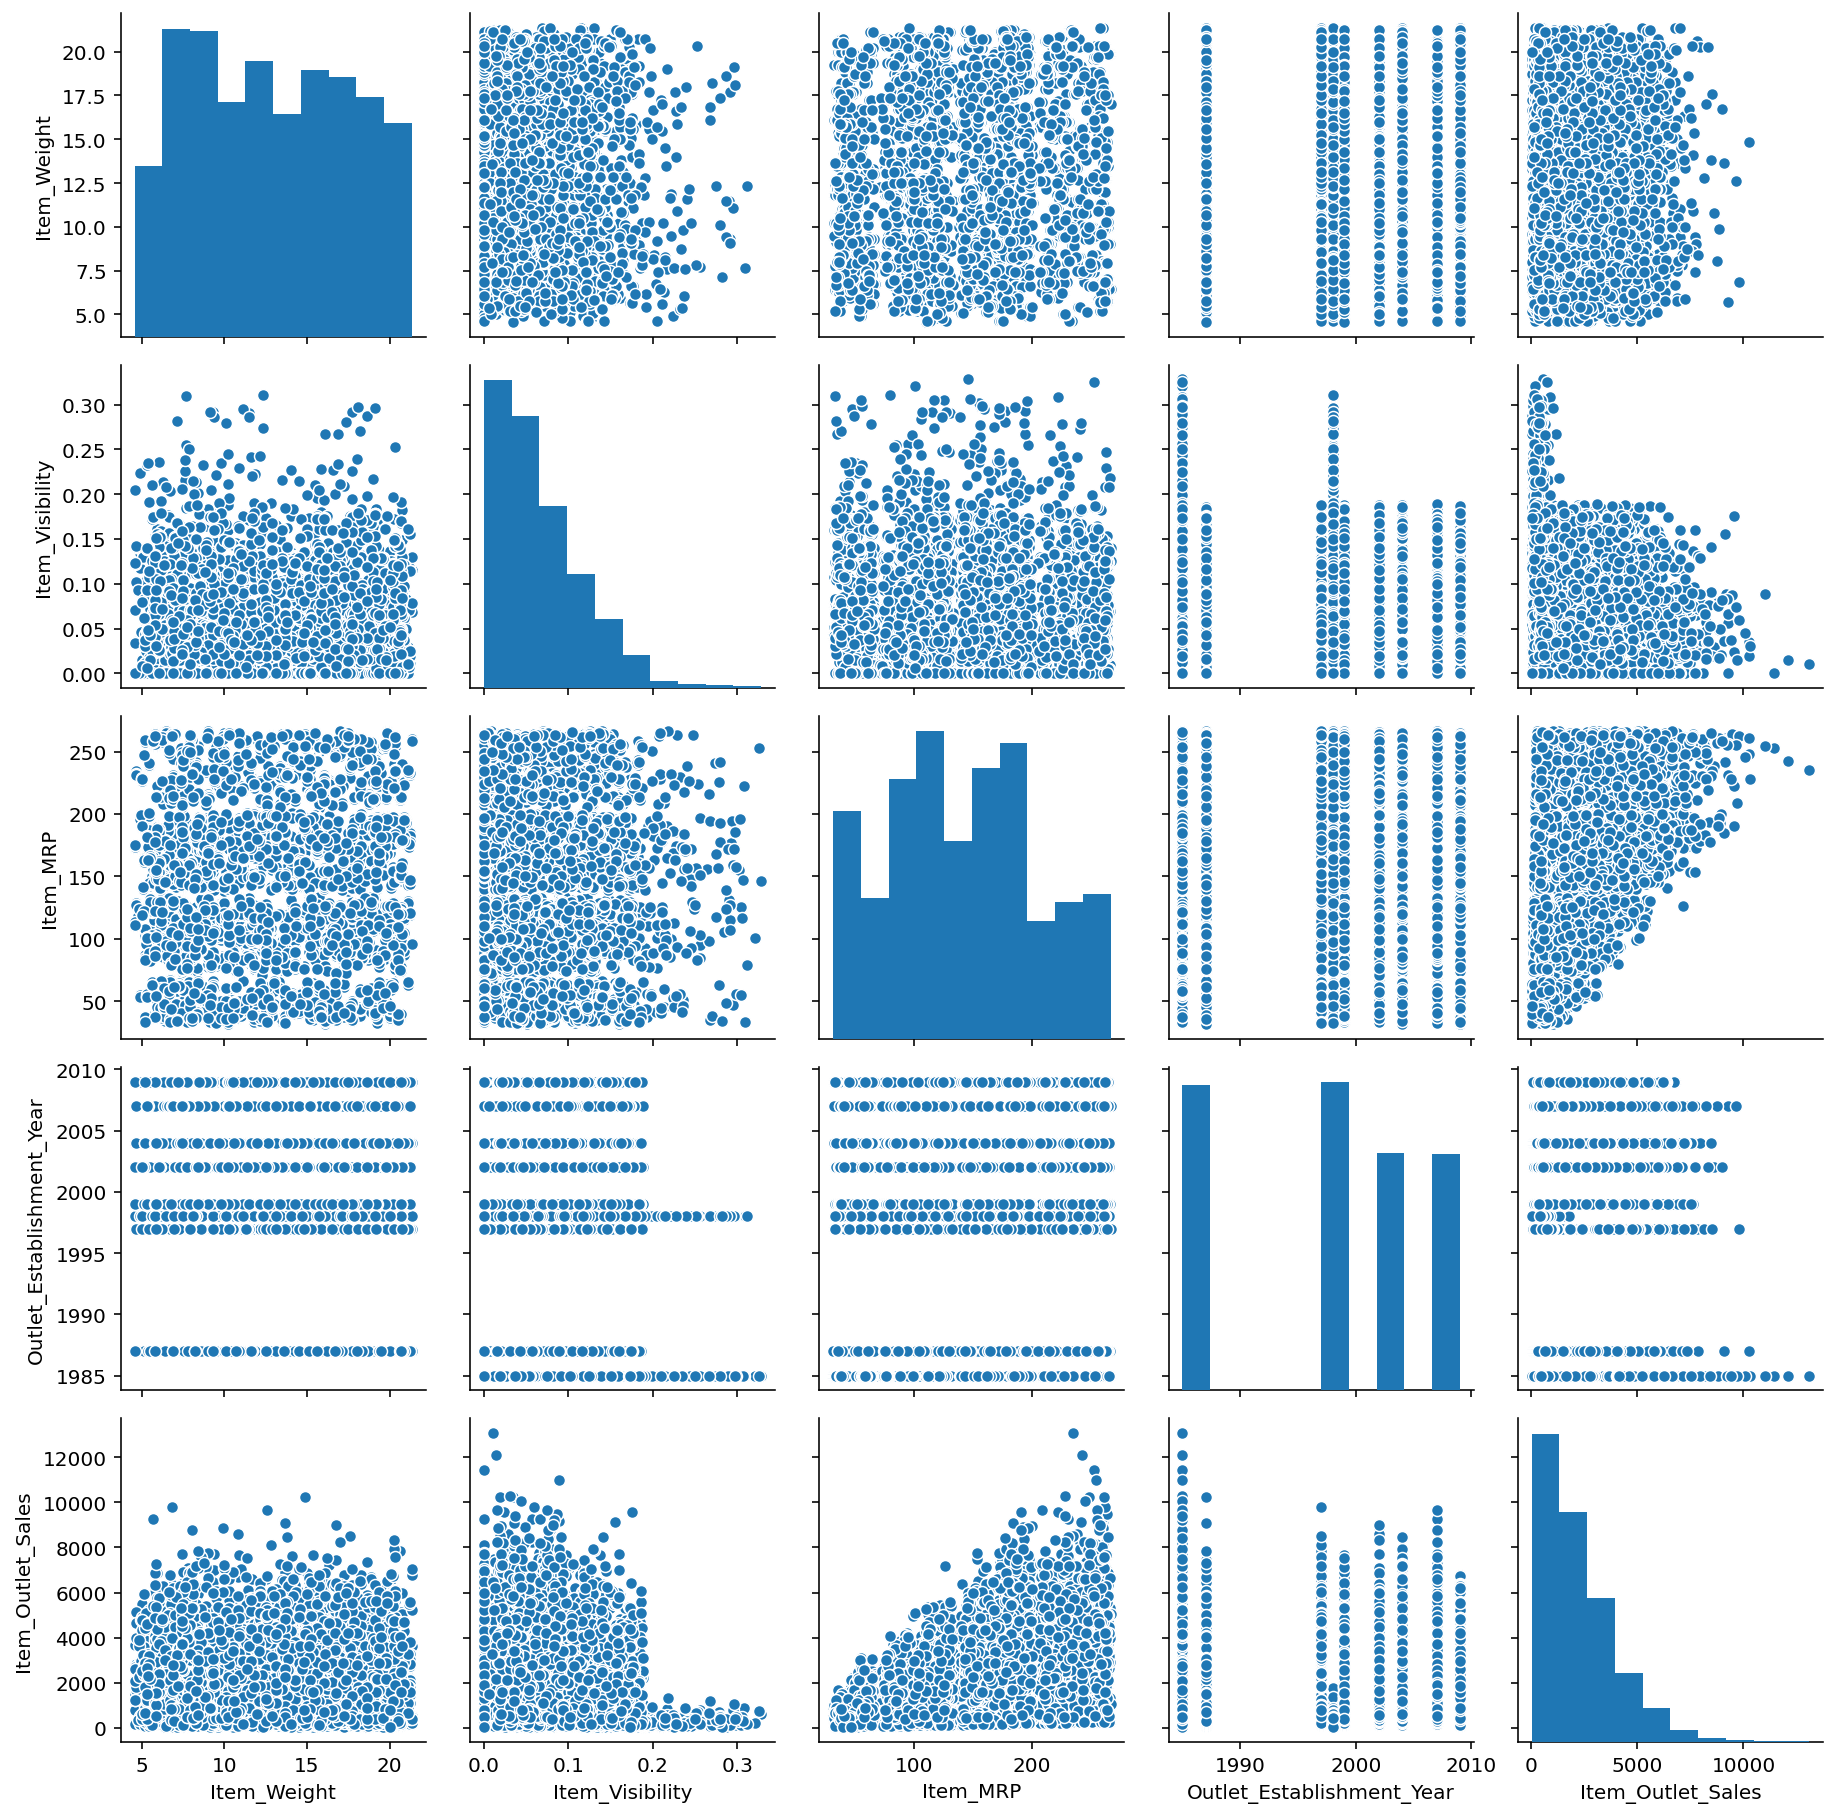

In [ ]:
sns.pairplot(df)

# Data Visualization
*Univariate plots*

5. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


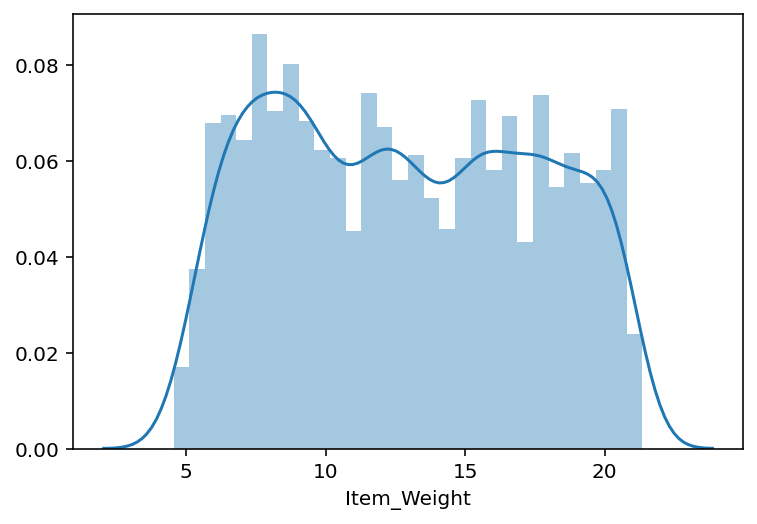

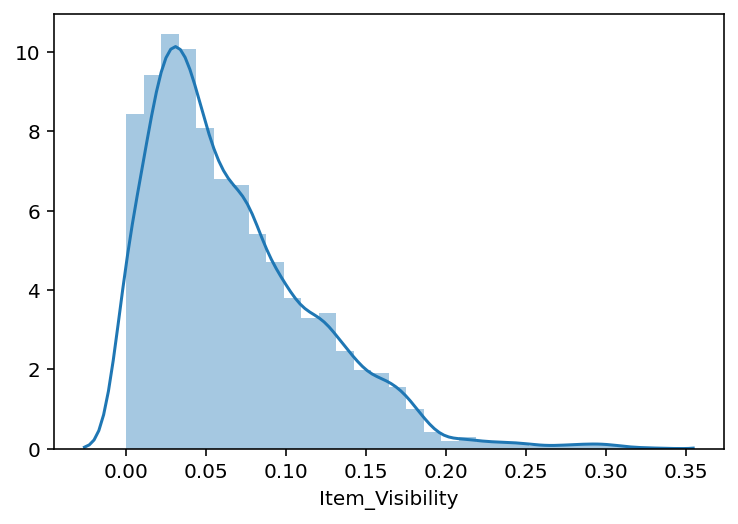

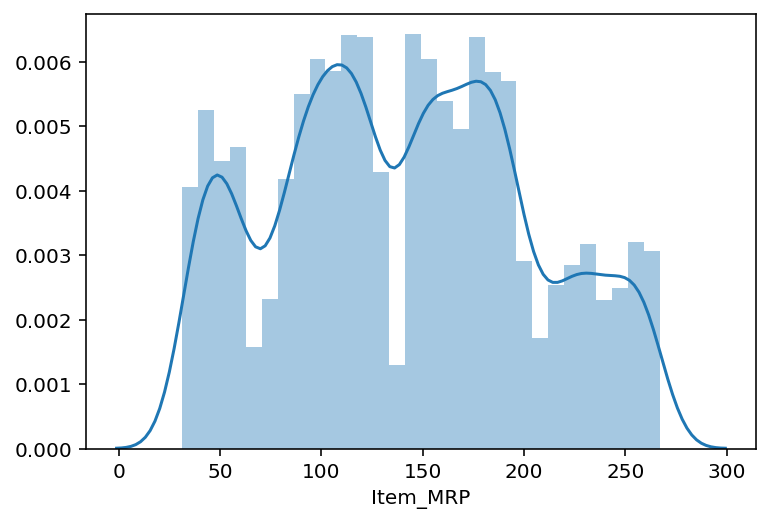

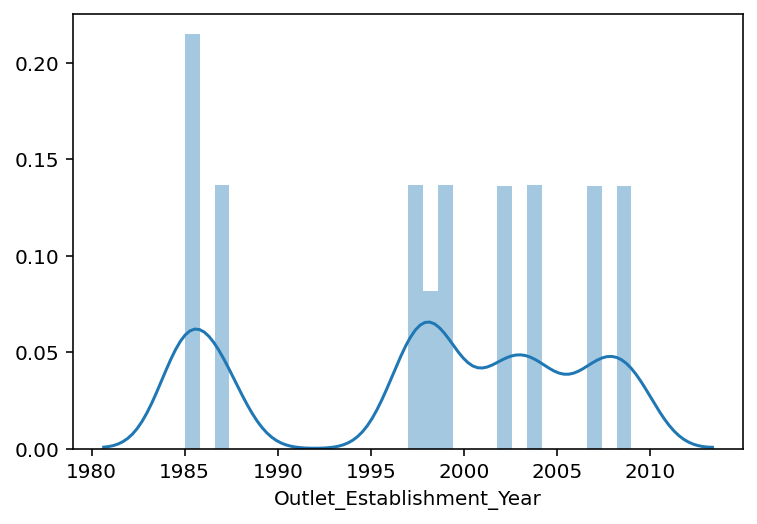

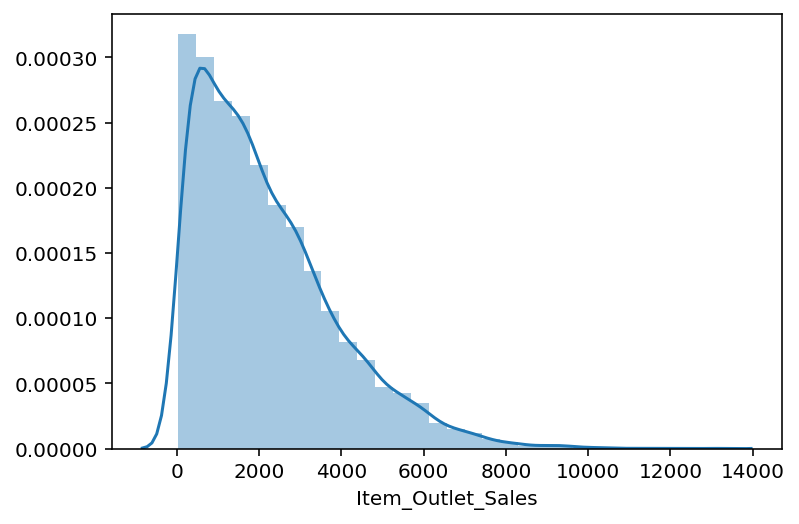

In [ ]:
for feature in features:
    if(df[feature].dtypes != object):
      skew = df[feature].skew()
      sns.distplot(df[feature], kde= True, label='Skew = %.3f' %(skew), bins=30)
      plt.show()

6. สร้าง countplot ของสินค้าแต่ละชนิด และ ปรับแกนให้เหมาะสม


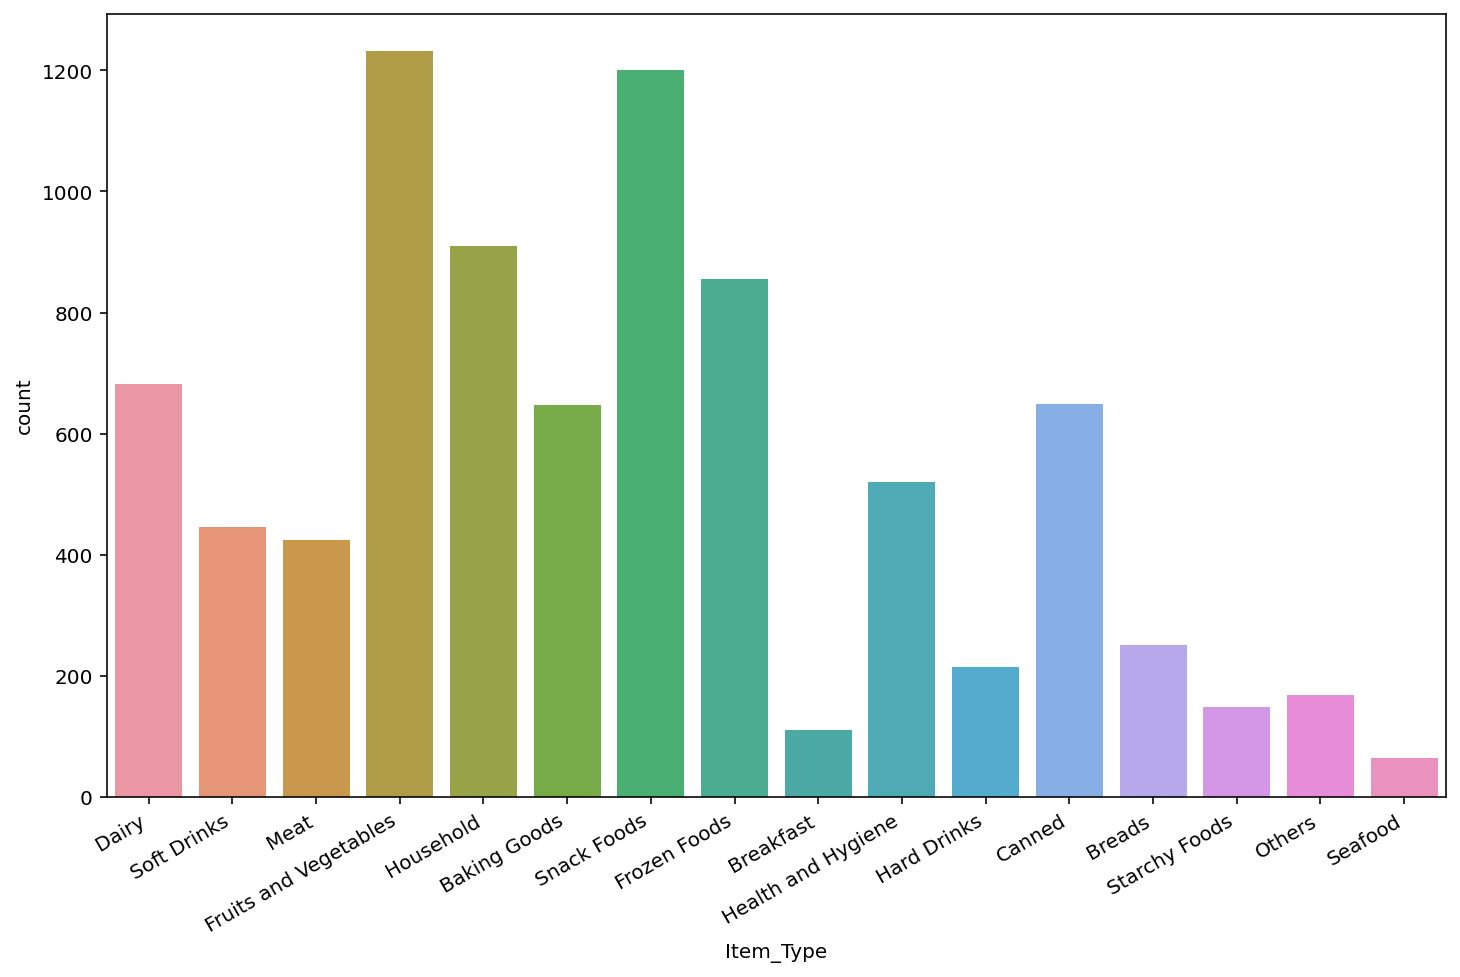

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(df['Item_Type'])
fig.autofmt_xdate()

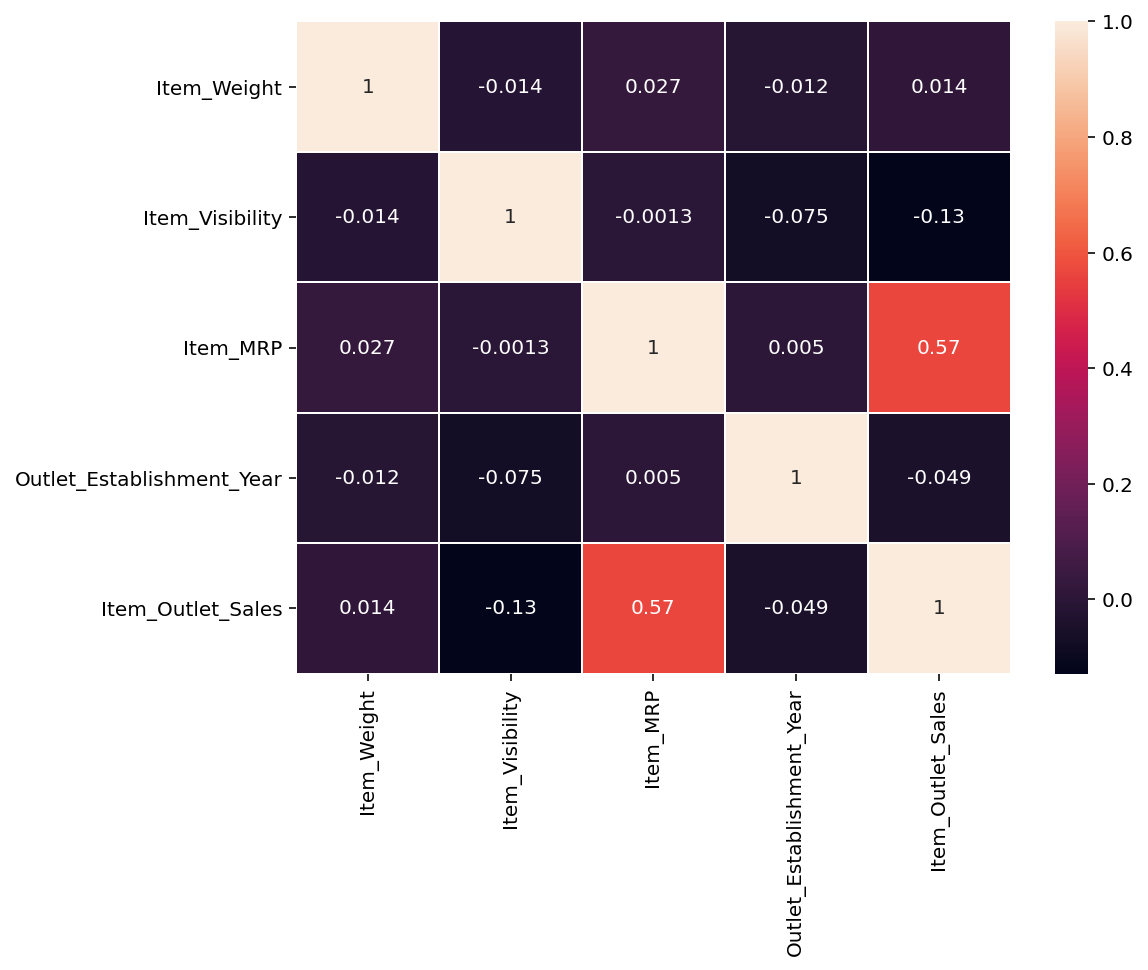

In [ ]:
fig = figure_size(8, 6)
sns.heatmap(df.corr(), annot=True, linewidths=.5)

8. หา Correlation ของทั้ง Dataframe


In [ ]:
df.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [ ]:
#correlation between feature and target
df.corr()['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด


In [ ]:
def find_max_corr(dataframe) :
  dataframe_corr = dataframe.corr()
  sorted_correlation = dataframe_corr.unstack().sort_values(ascending =True)
  return sorted_correlation
print(find_max_corr(df))

Item_Outlet_Sales          Item_Visibility             -0.128625
Item_Visibility            Item_Outlet_Sales           -0.128625
                           Outlet_Establishment_Year   -0.074834
Outlet_Establishment_Year  Item_Visibility             -0.074834
                           Item_Outlet_Sales           -0.049135
Item_Outlet_Sales          Outlet_Establishment_Year   -0.049135
Item_Weight                Item_Visibility             -0.014048
Item_Visibility            Item_Weight                 -0.014048
Item_Weight                Outlet_Establishment_Year   -0.011588
Outlet_Establishment_Year  Item_Weight                 -0.011588
Item_Visibility            Item_MRP                    -0.001315
Item_MRP                   Item_Visibility             -0.001315
Outlet_Establishment_Year  Item_MRP                     0.005020
Item_MRP                   Outlet_Establishment_Year    0.005020
Item_Outlet_Sales          Item_Weight                  0.014123
Item_Weight              

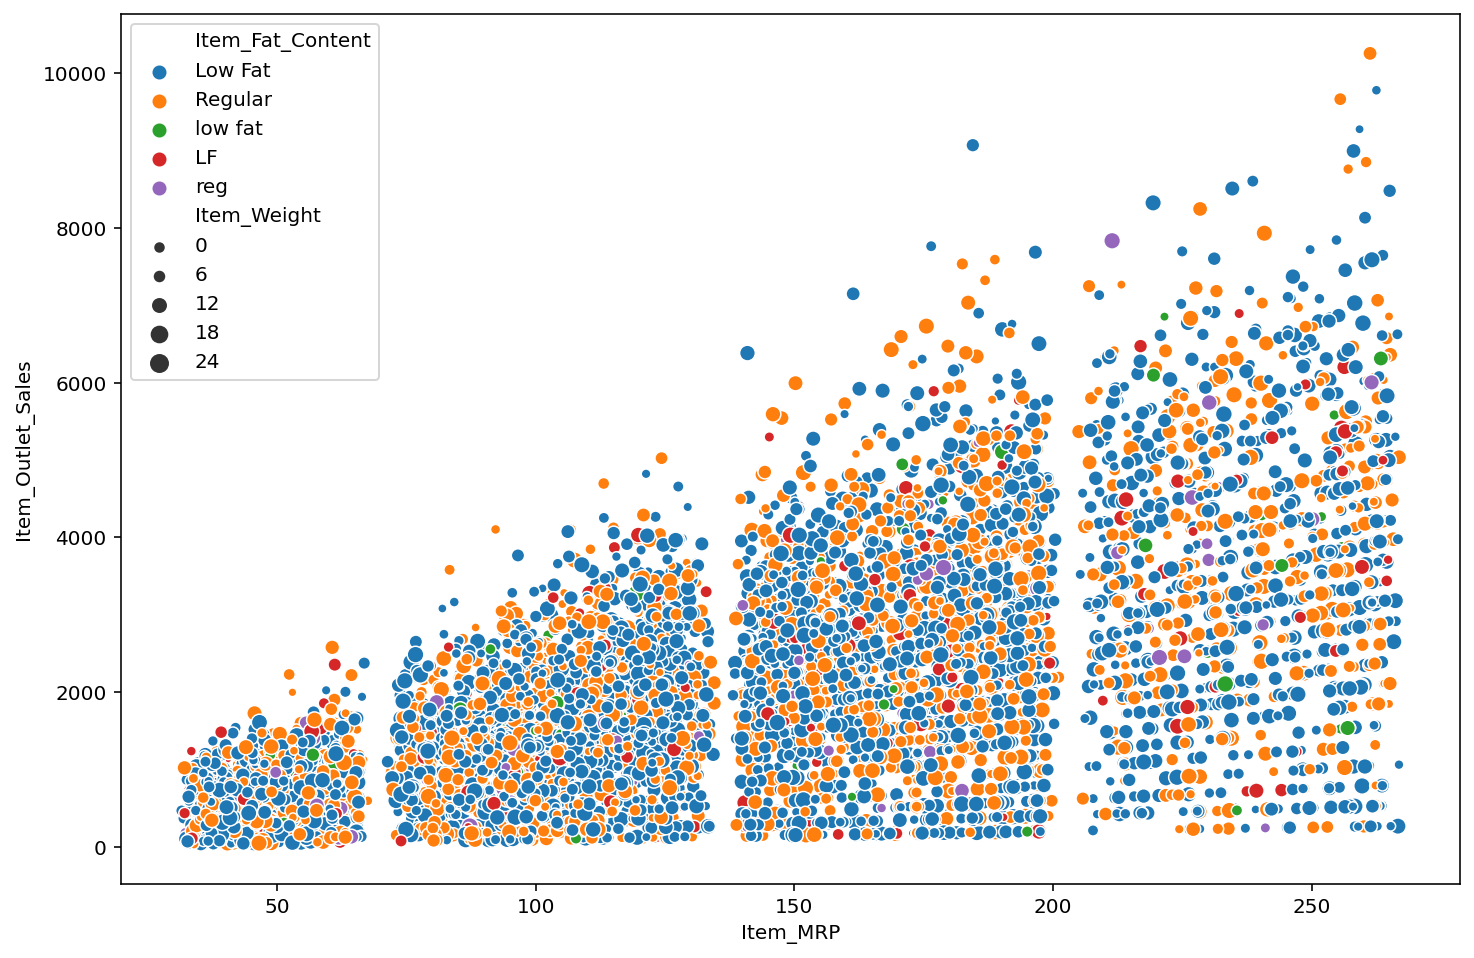

In [ ]:
fig = figure_size(12, 8)
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

10. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

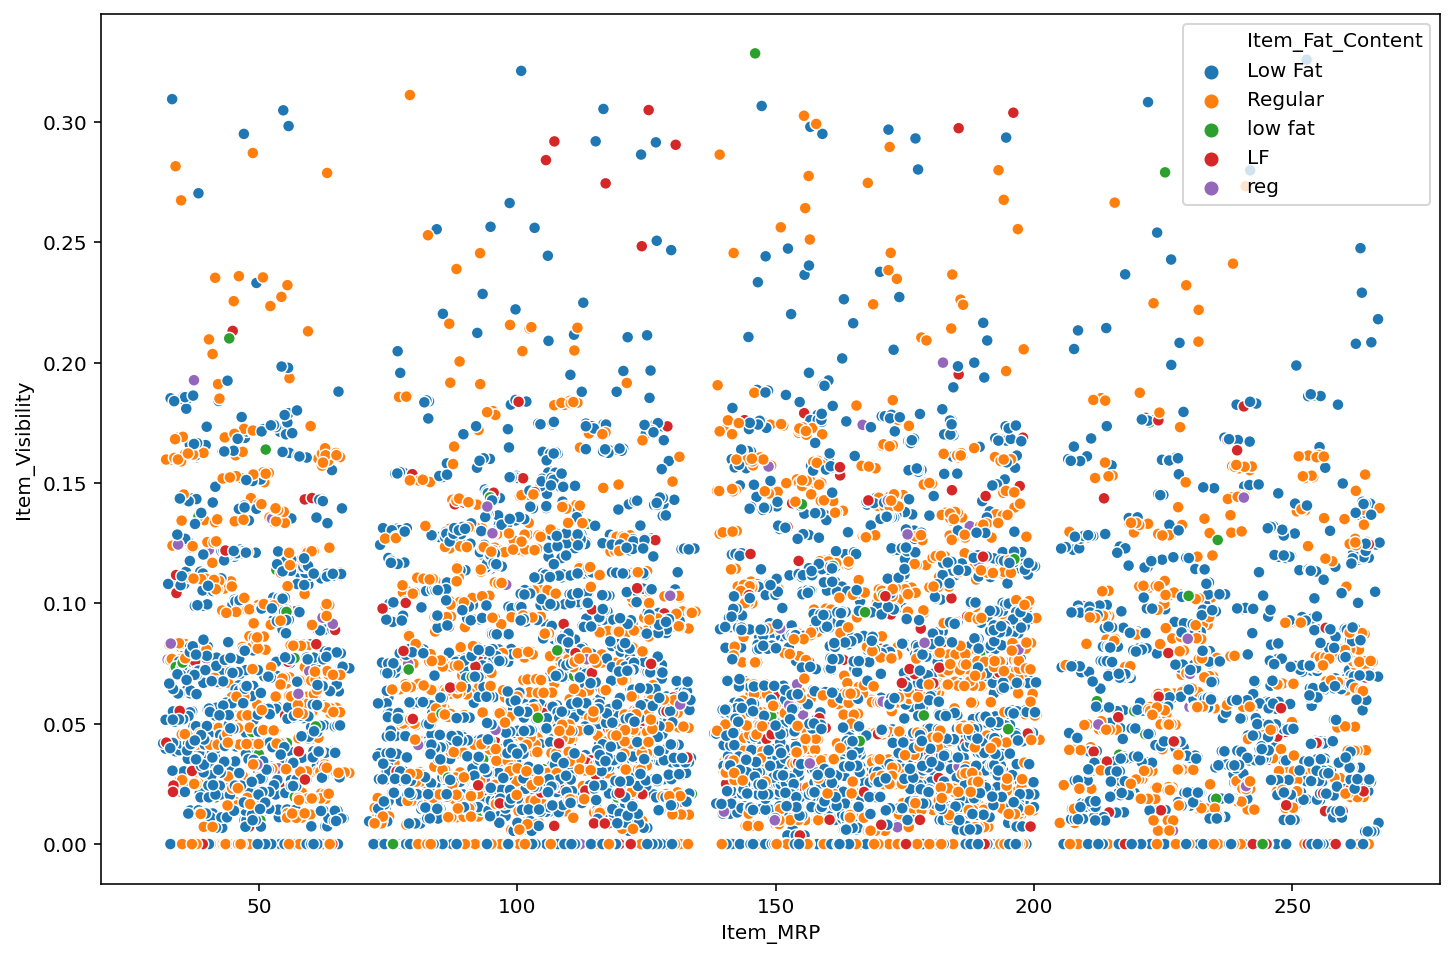

In [ ]:
fig = figure_size(12, 8)
sns.scatterplot(x='Item_MRP',y='Item_Visibility',hue='Item_Fat_Content',data=df)

In [ ]:
features = df.drop(columns=['Item_Outlet_Sales'])

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
print(df.nunique())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [ ]:
#label for each values in this feature is same meaning but not use 1 label for recording so i will change this label 
df.Item_Fat_Content=df.Item_Fat_Content.replace(['LF', 'Low Fat', 'low fat'],'low_fat')
df.Item_Fat_Content=df.Item_Fat_Content.replace(['reg', 'Regular'],'regular')

In [ ]:
df.Item_Fat_Content.value_counts()

low_fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

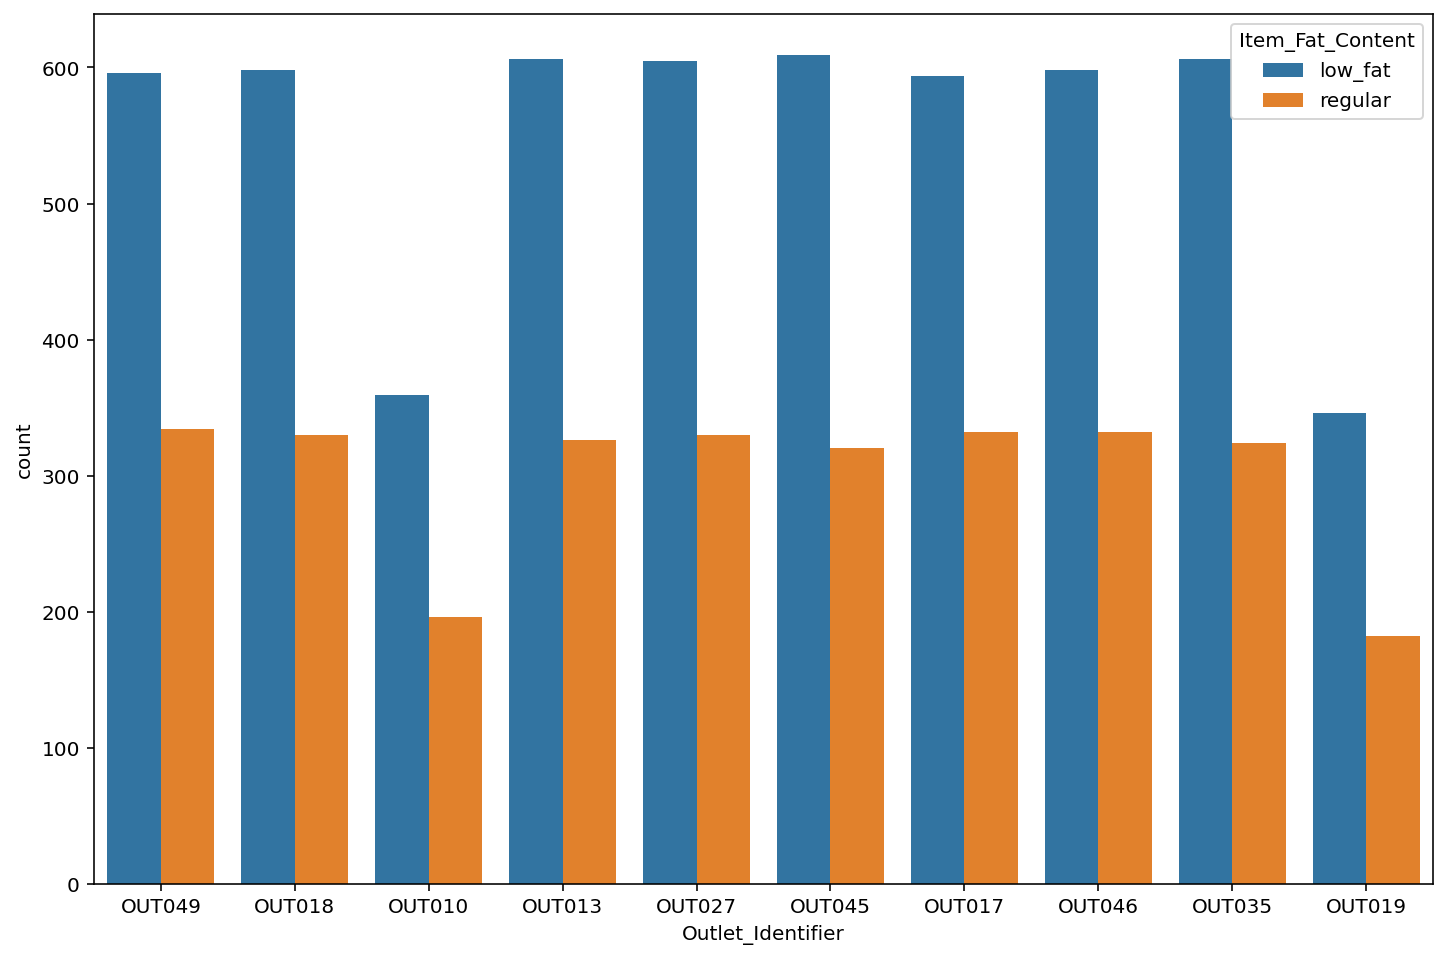

In [ ]:
fig = figure_size(12, 8)
sns.countplot(x = 'Outlet_Identifier', hue='Item_Fat_Content', data=df)

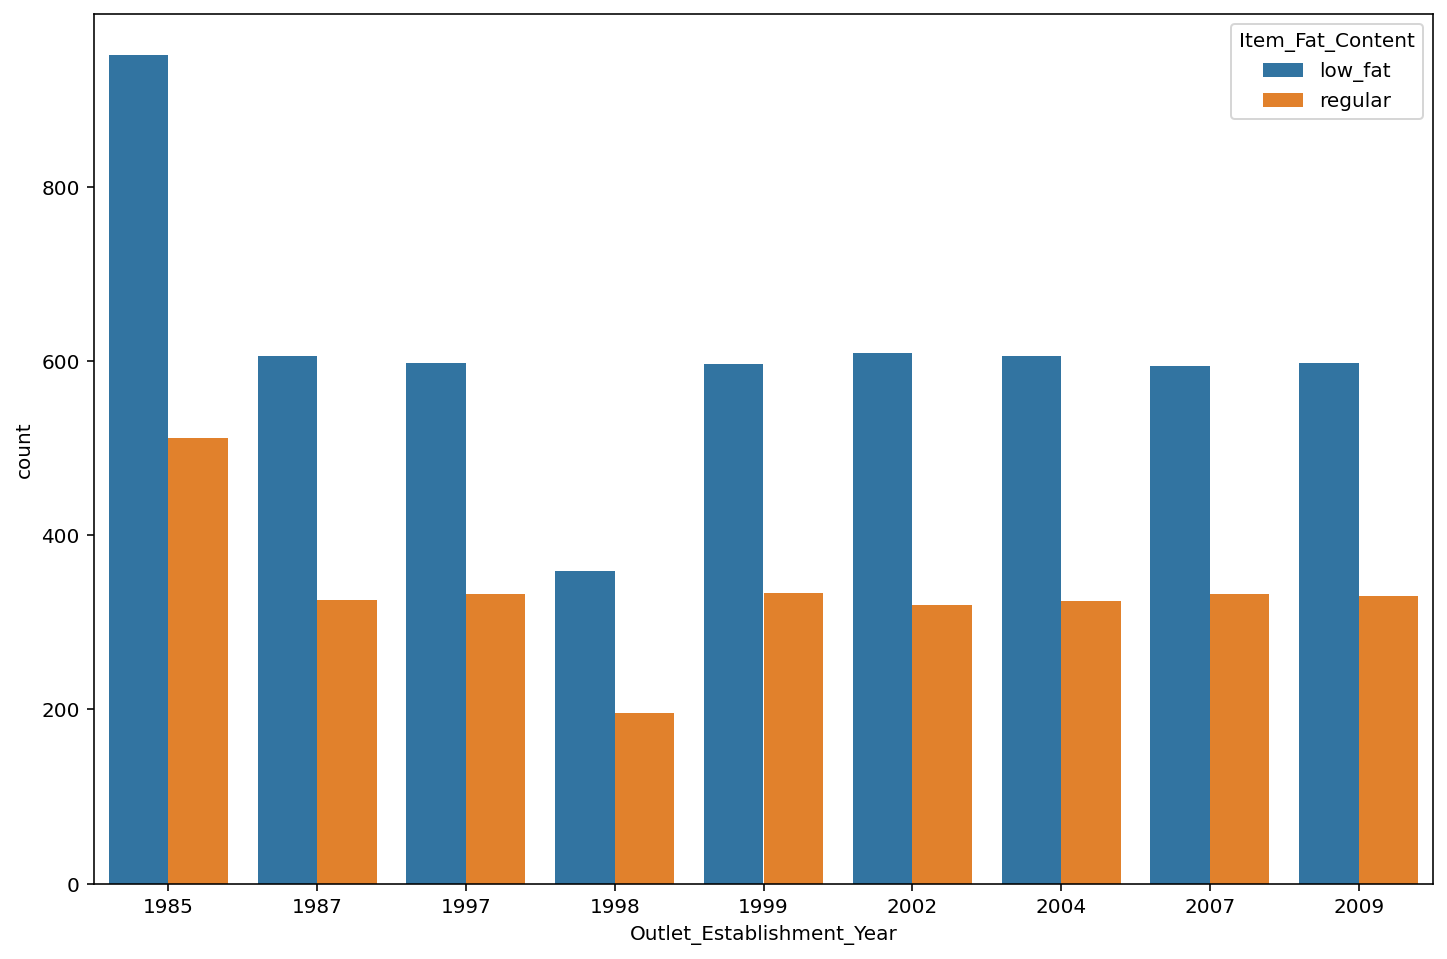

In [ ]:
fig = figure_size(12, 8)
sns.countplot(x = 'Outlet_Establishment_Year', hue='Item_Fat_Content', data=df)

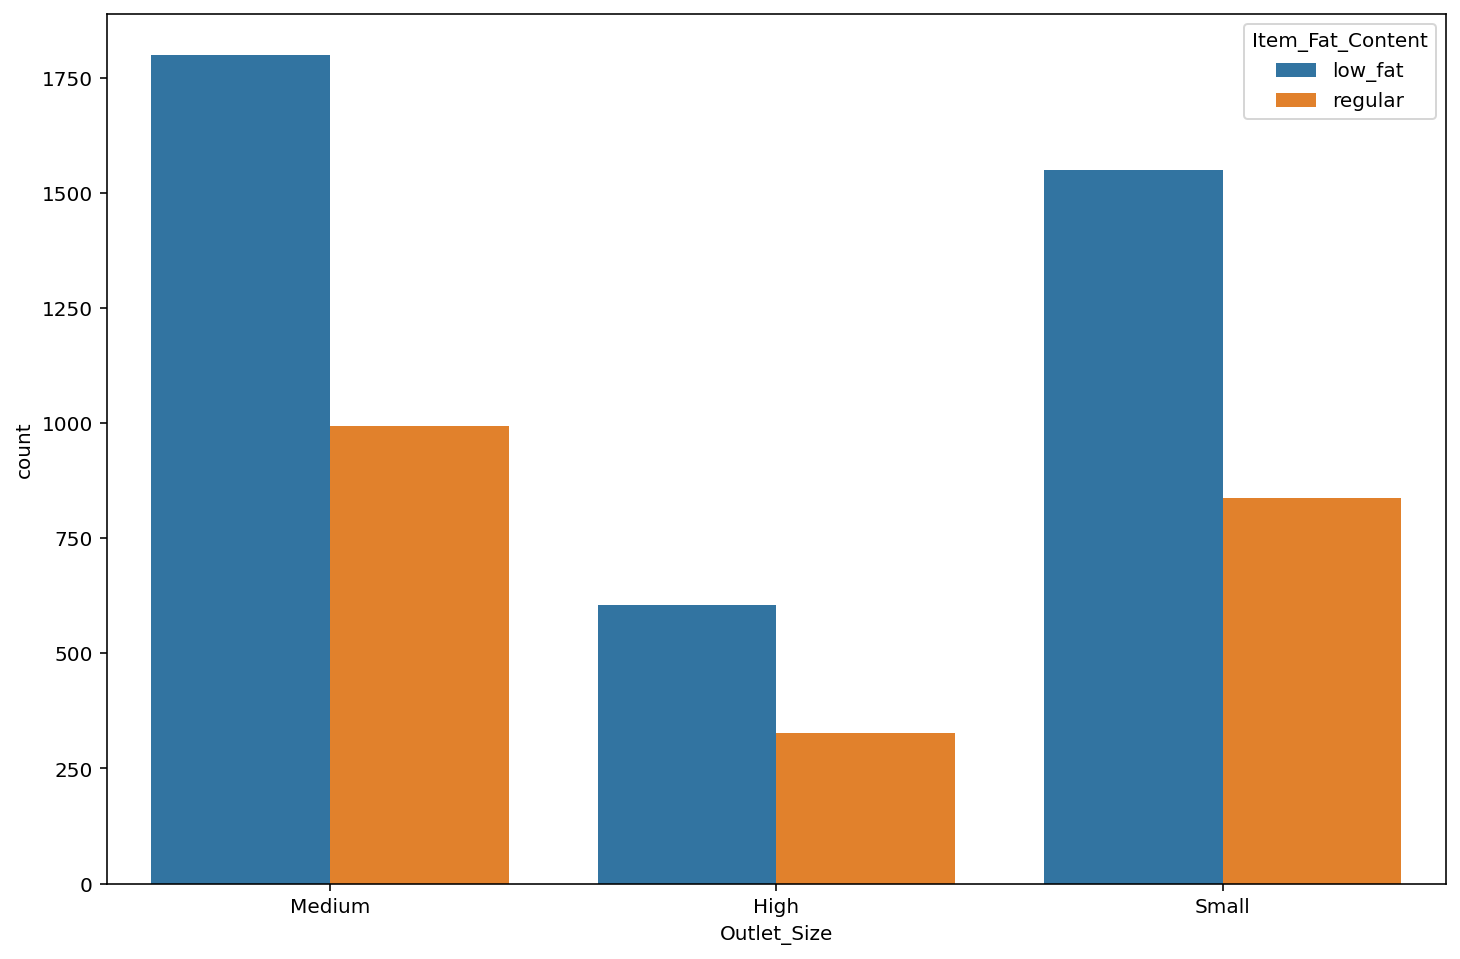

In [ ]:
fig = figure_size(12, 8)
sns.countplot(x = 'Outlet_Size', hue='Item_Fat_Content', data=df)

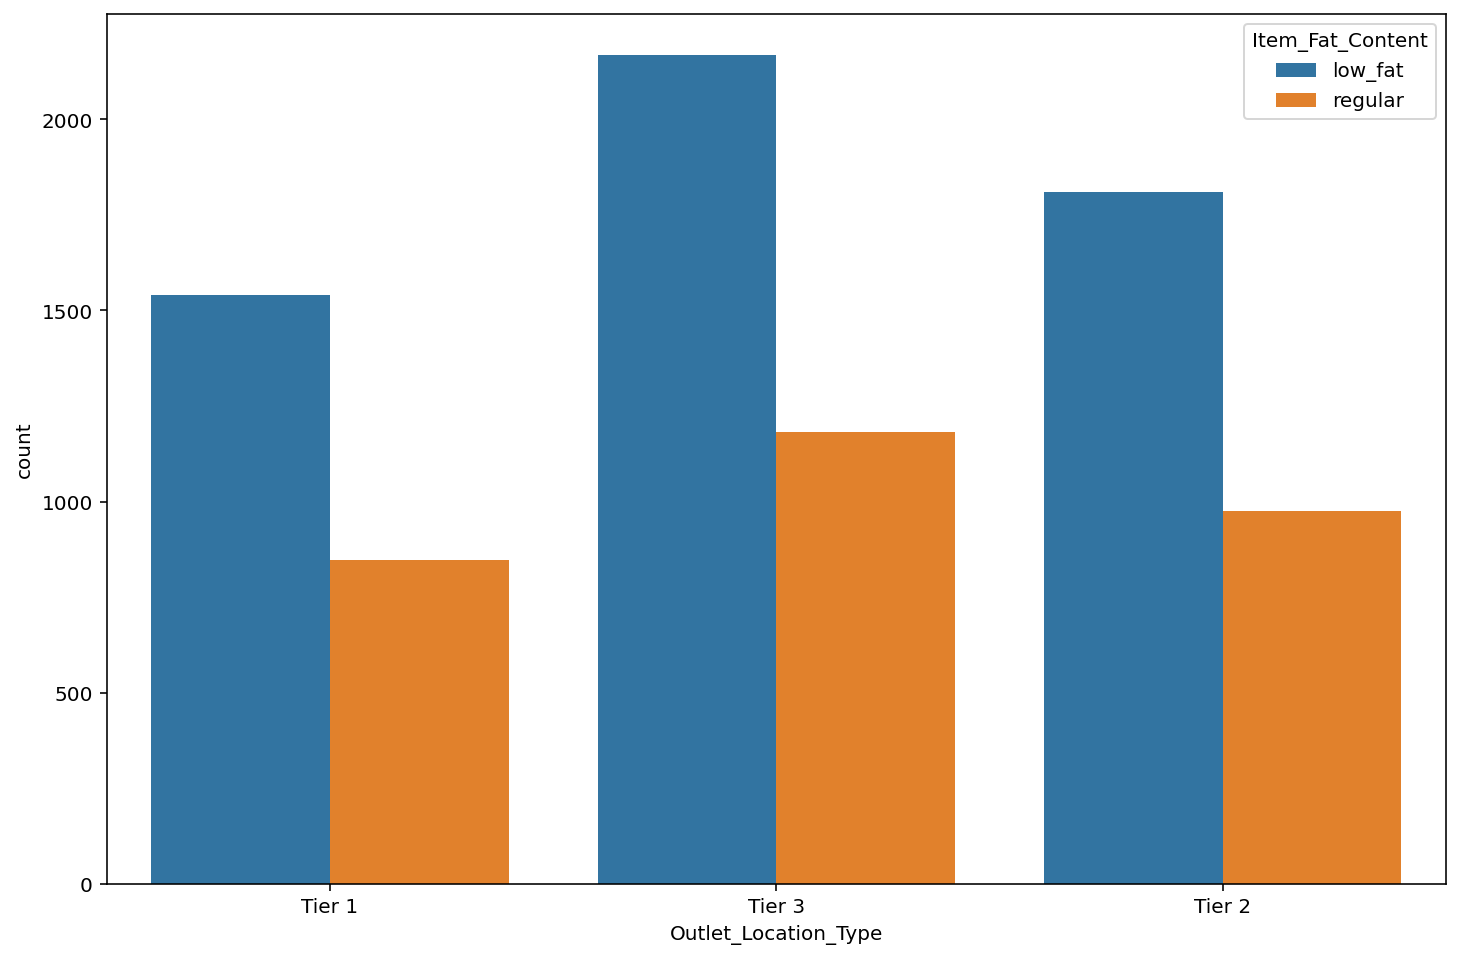

In [ ]:
fig = figure_size(12, 8)
sns.countplot(x = 'Outlet_Location_Type', hue='Item_Fat_Content', data=df)

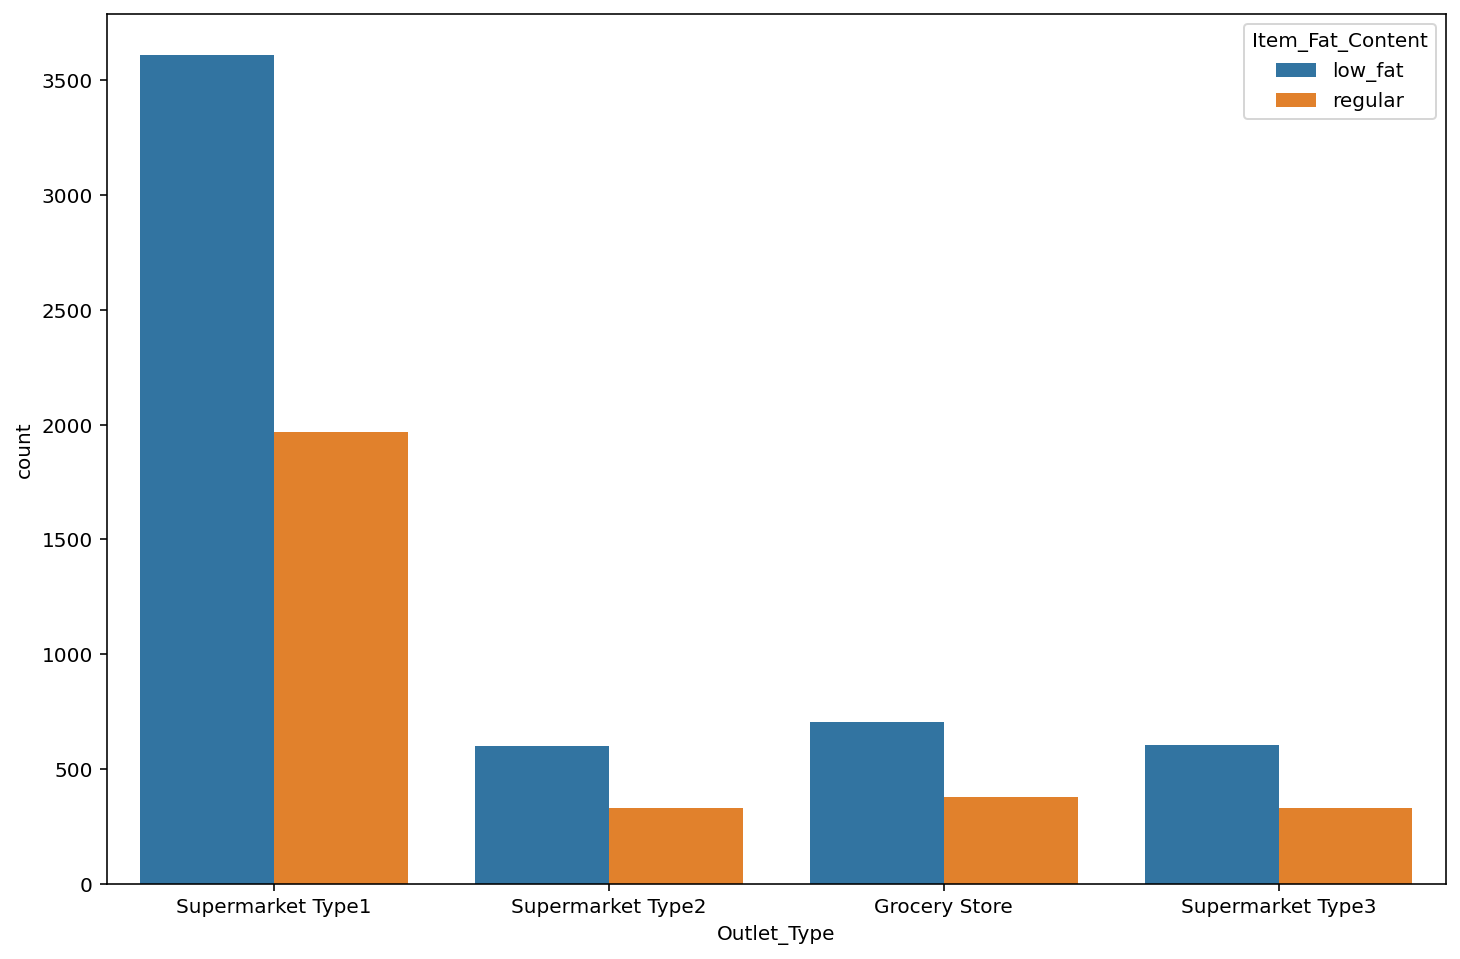

In [ ]:
fig = figure_size(12, 8)
sns.countplot(x = 'Outlet_Type', hue='Item_Fat_Content', data=df)

13. สร้าง scatterplot figure ขนาด 12x8 ให้แกน X เป็น Item_MRP แกน Y เป็น Target แบ่งประเภทด้วย Item_fat_content ขนาดเท่ากับน้ำหนัก ลงสี palette 


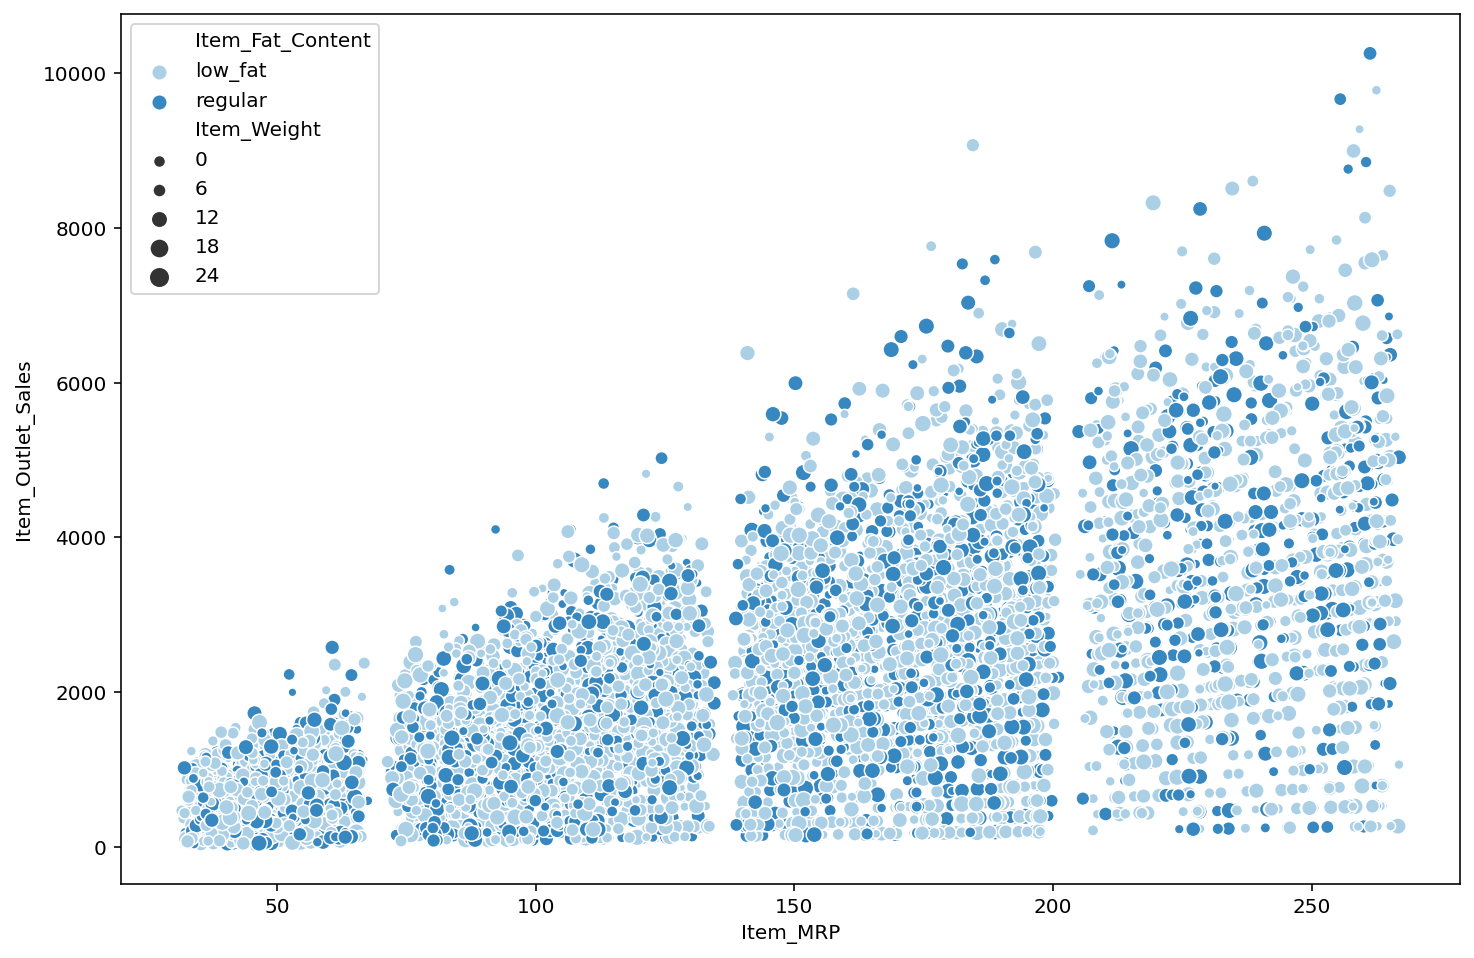

In [ ]:
fig = figure_size(12, 8)
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df, palette='Blues')

14. สร้าง box plot ของ target กับชนิดสิ่งของ 

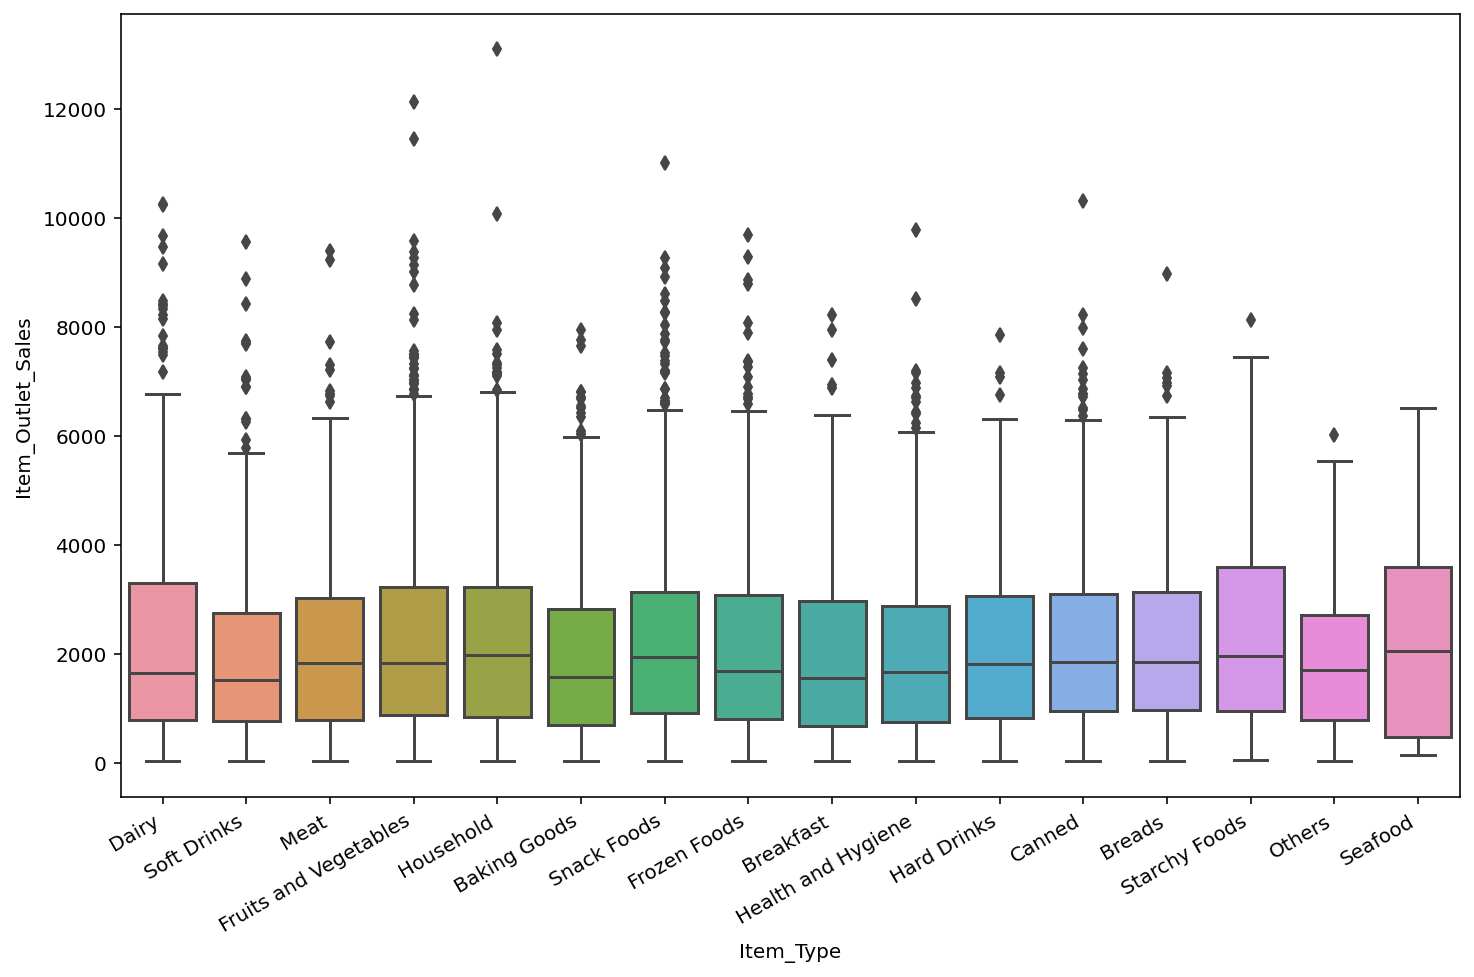

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df, )
fig.autofmt_xdate()

15. สร้าง box plot ของ target กับขนาดของ outlet


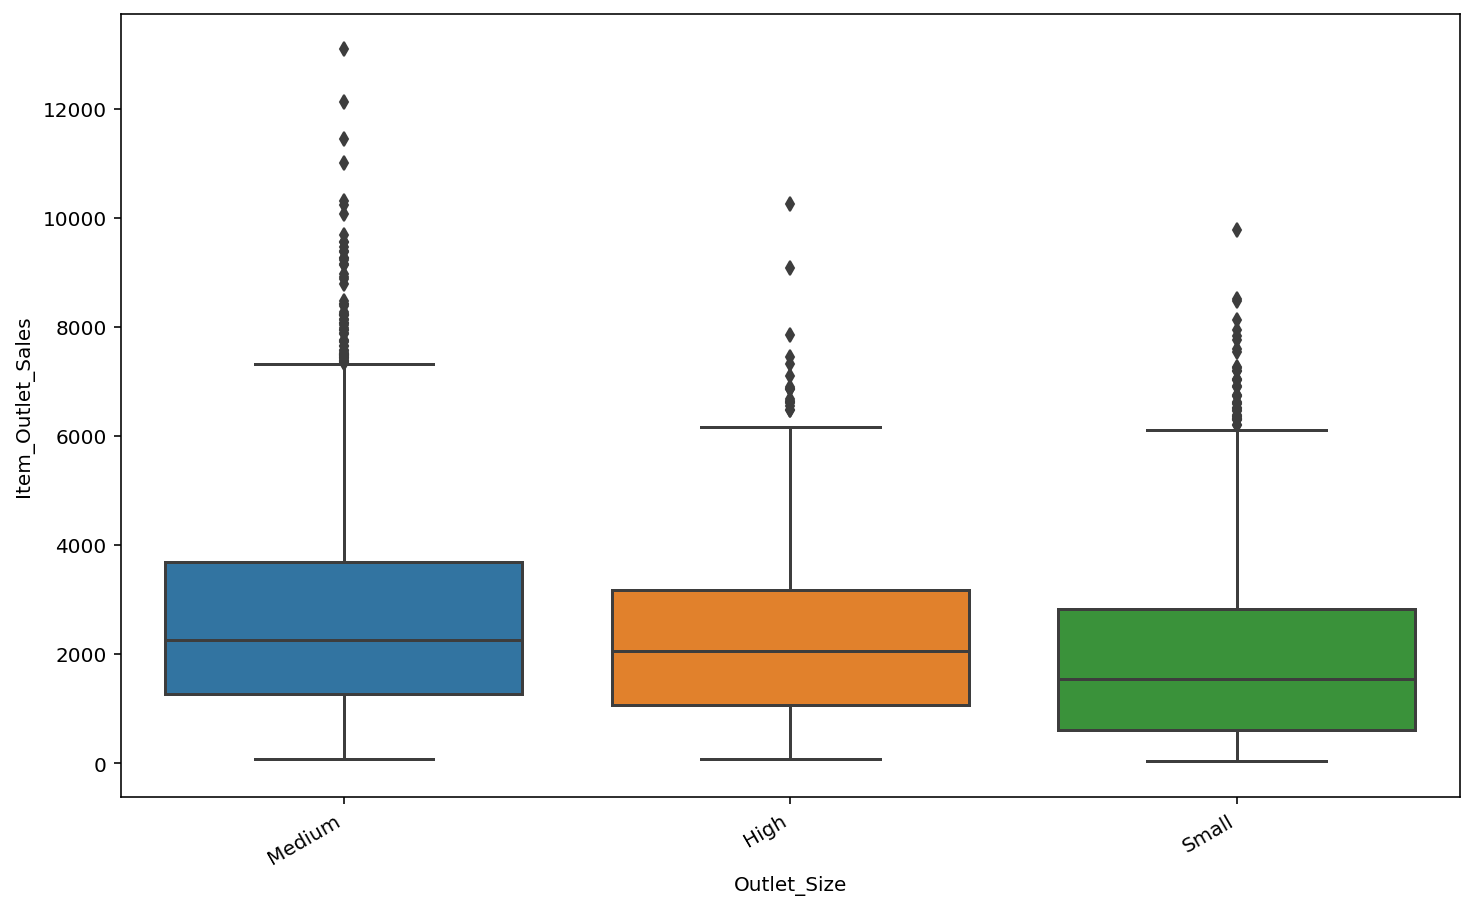

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df, )
fig.autofmt_xdate()

16. สร้าง box plot ของ target กับชนิดของ outlet


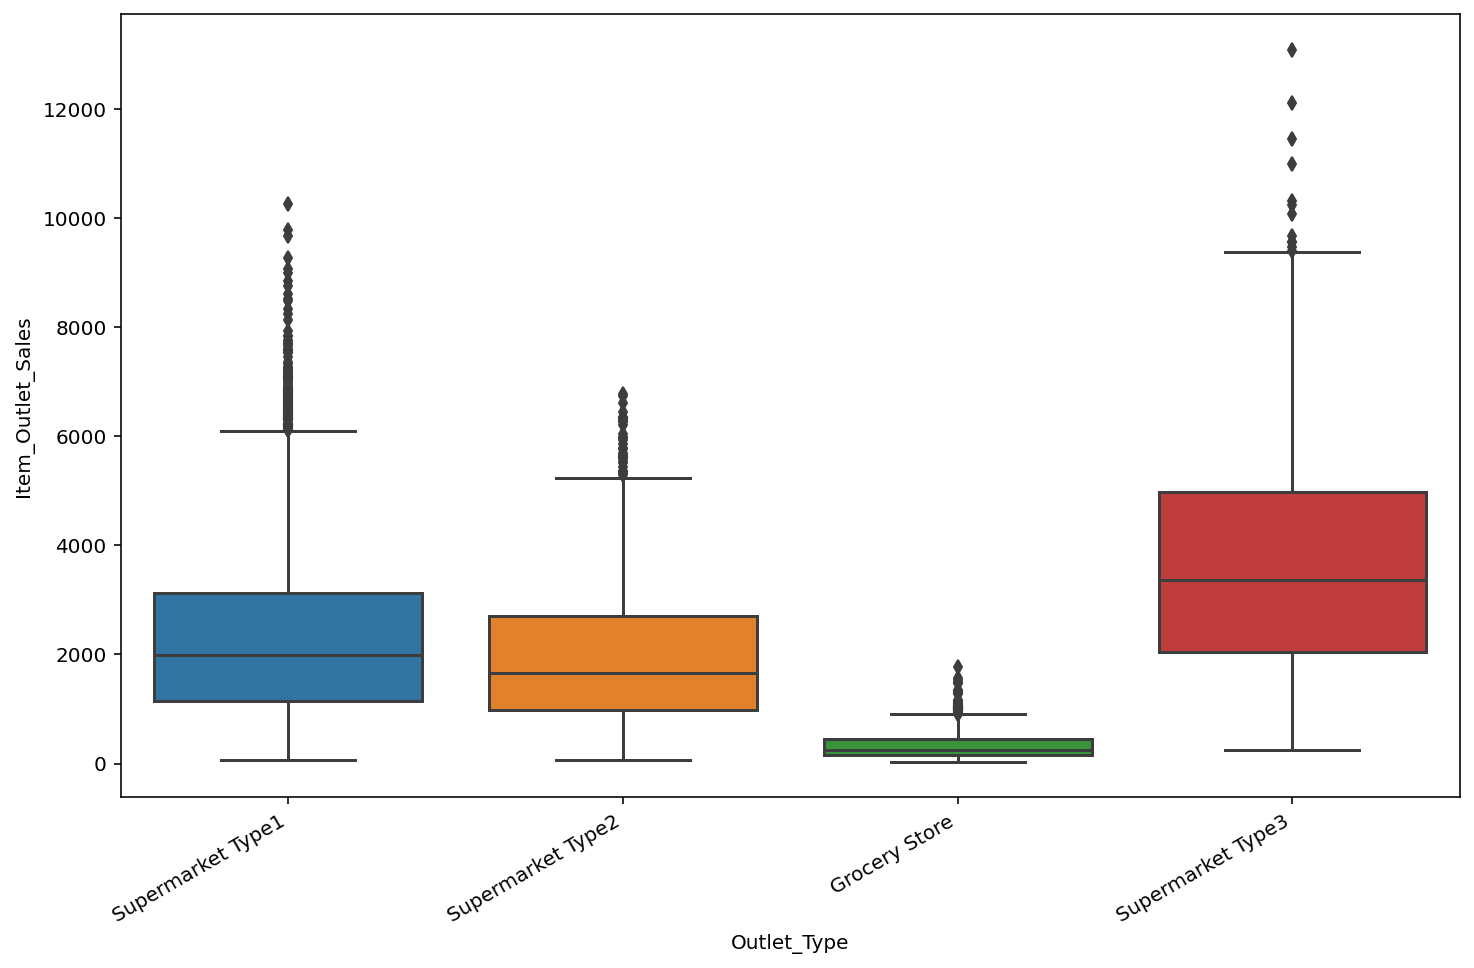

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df, )
fig.autofmt_xdate()

17. สร้าง box plot ของ target กับชนิดของ location ของ outlet



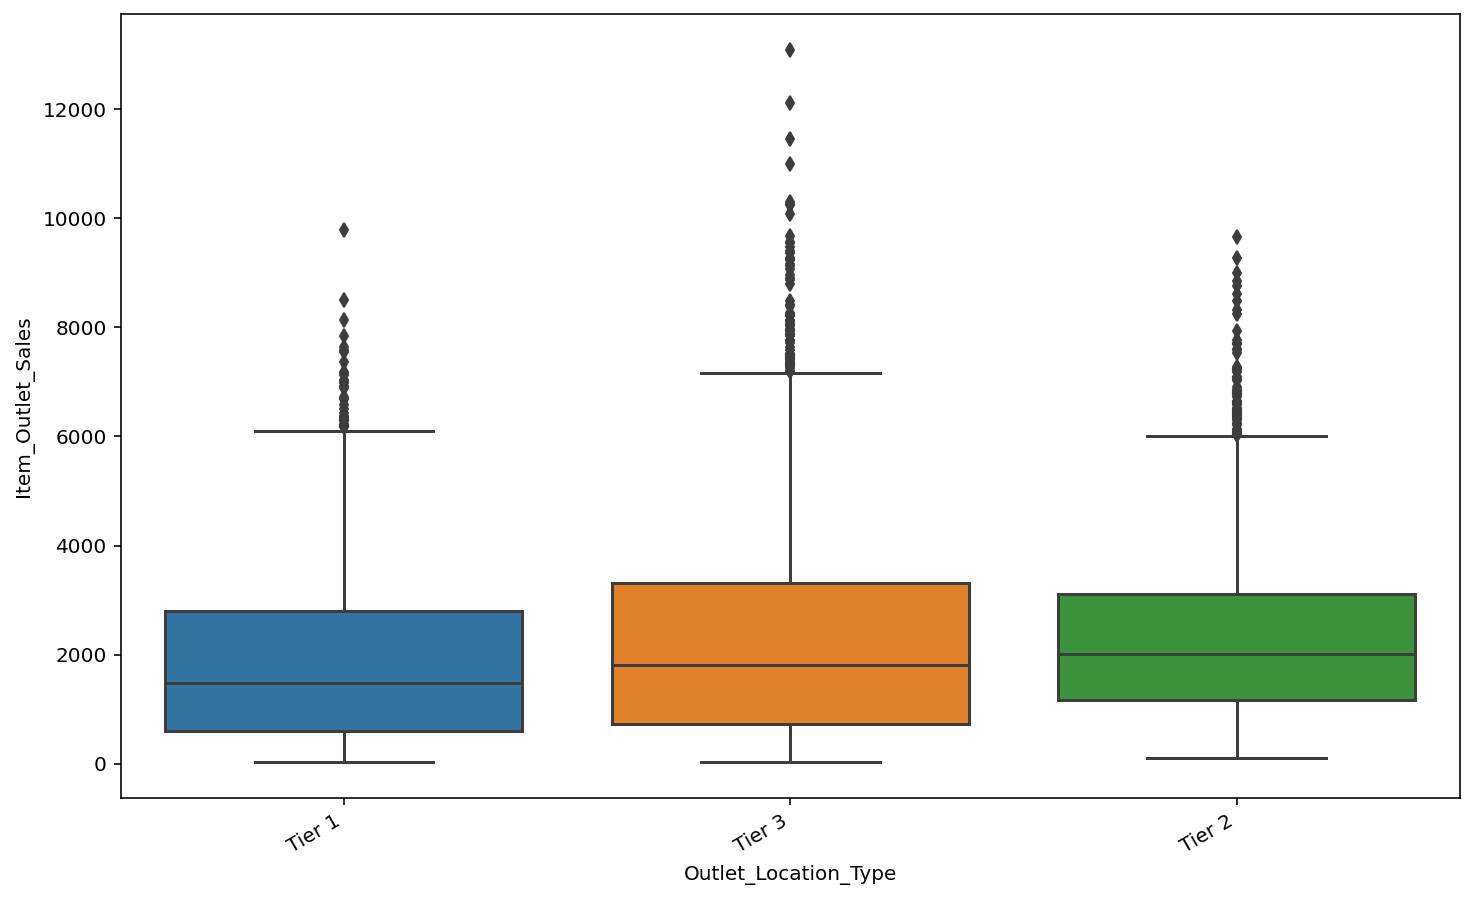

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df, )
fig.autofmt_xdate()

18. สร้าง box plot ของ target กับ Item_fat_content

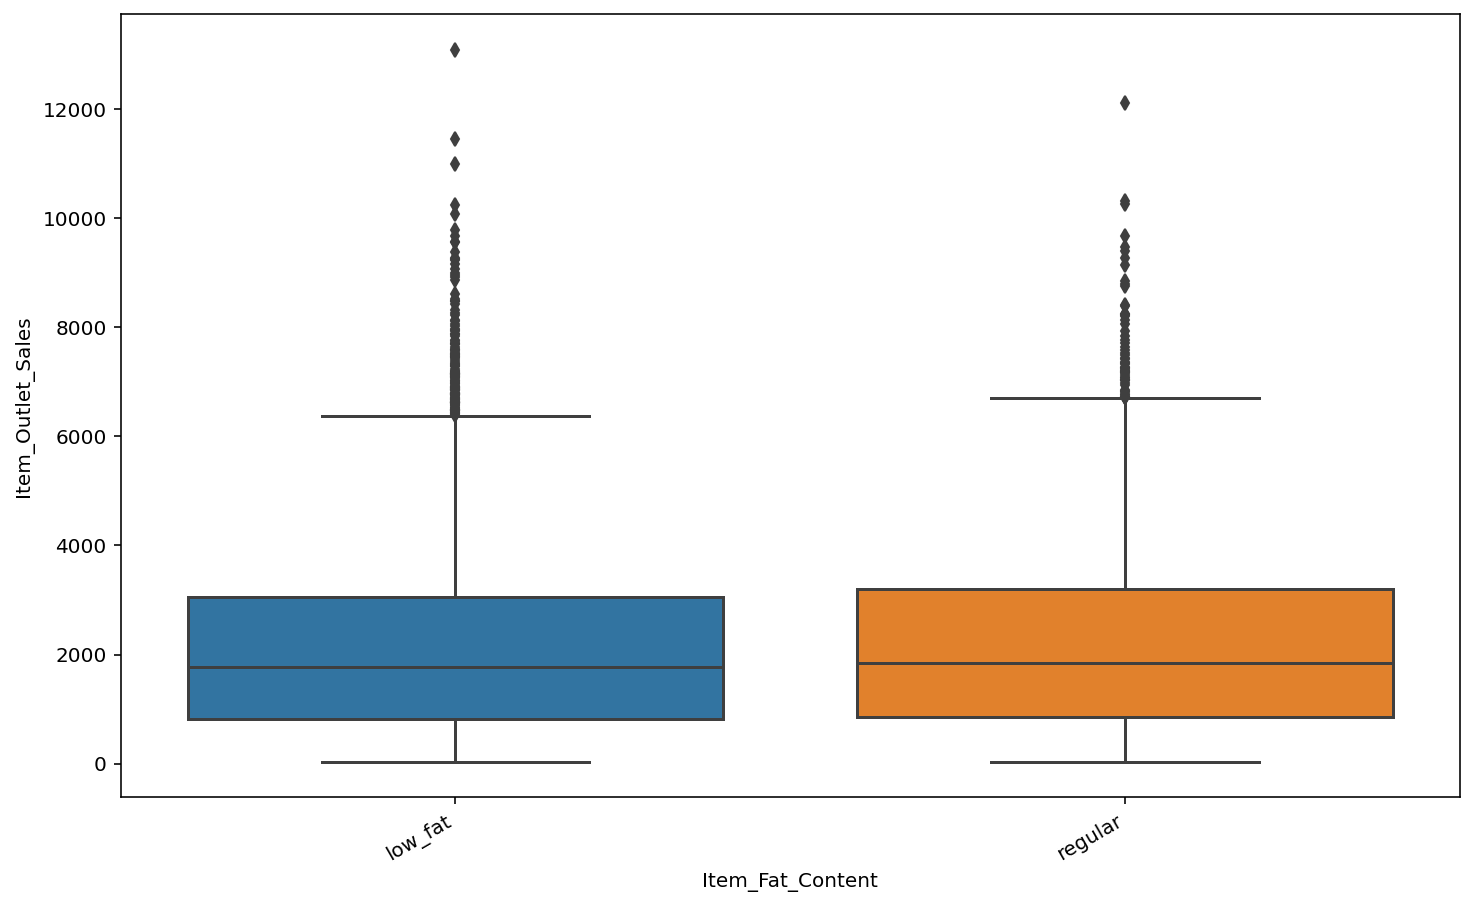

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df, )
fig.autofmt_xdate()

19. สร้าง box plot ของ Item_fat_content กับ Item_MRP


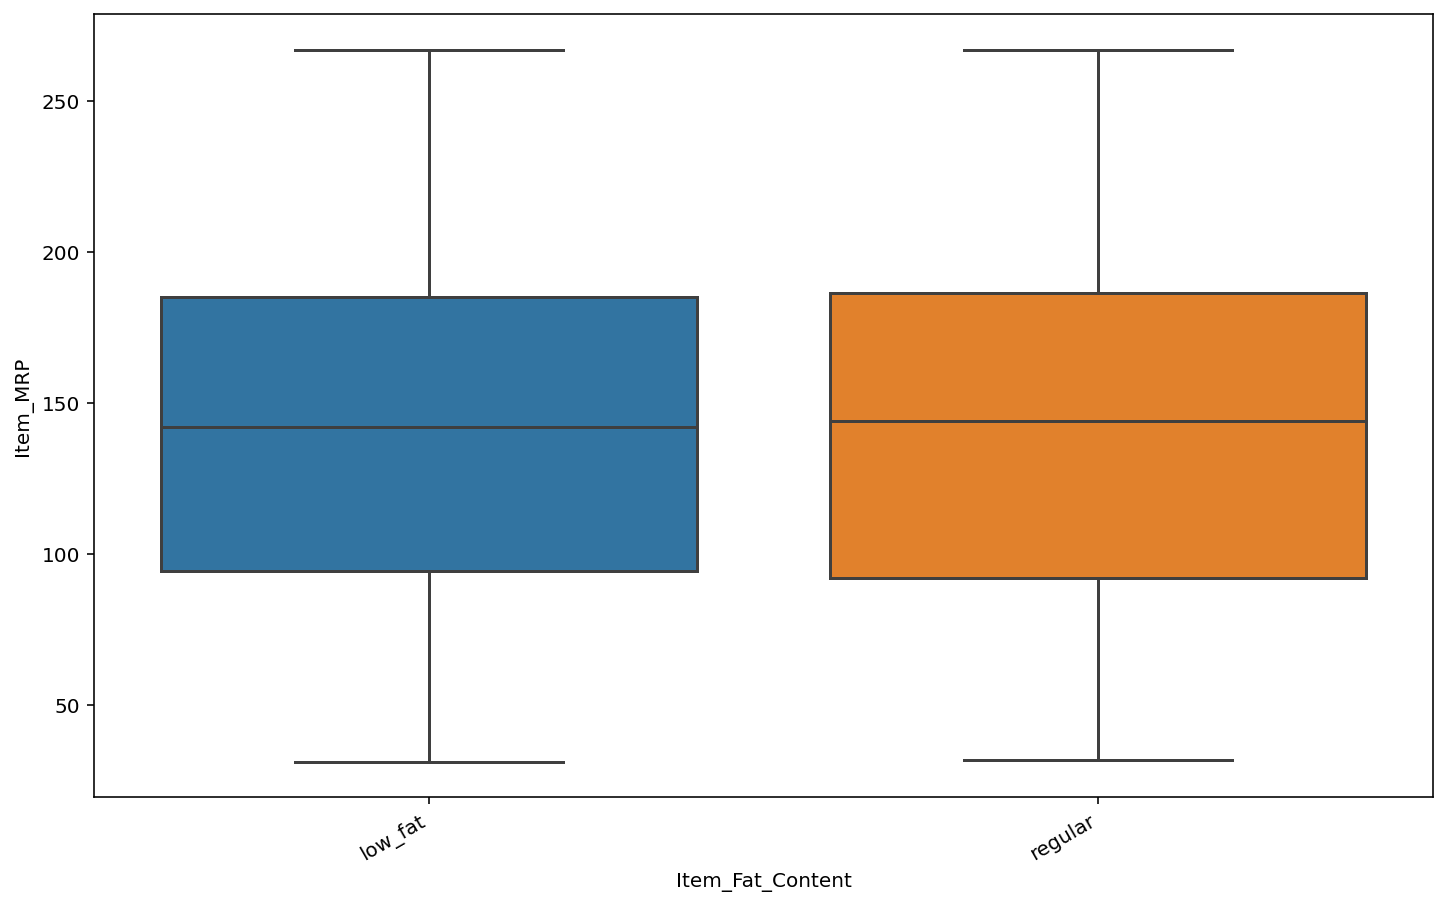

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df, )
fig.autofmt_xdate()

20. สร้าง box plot ของ item_fat_content กับน้ำหนักของสินค้า


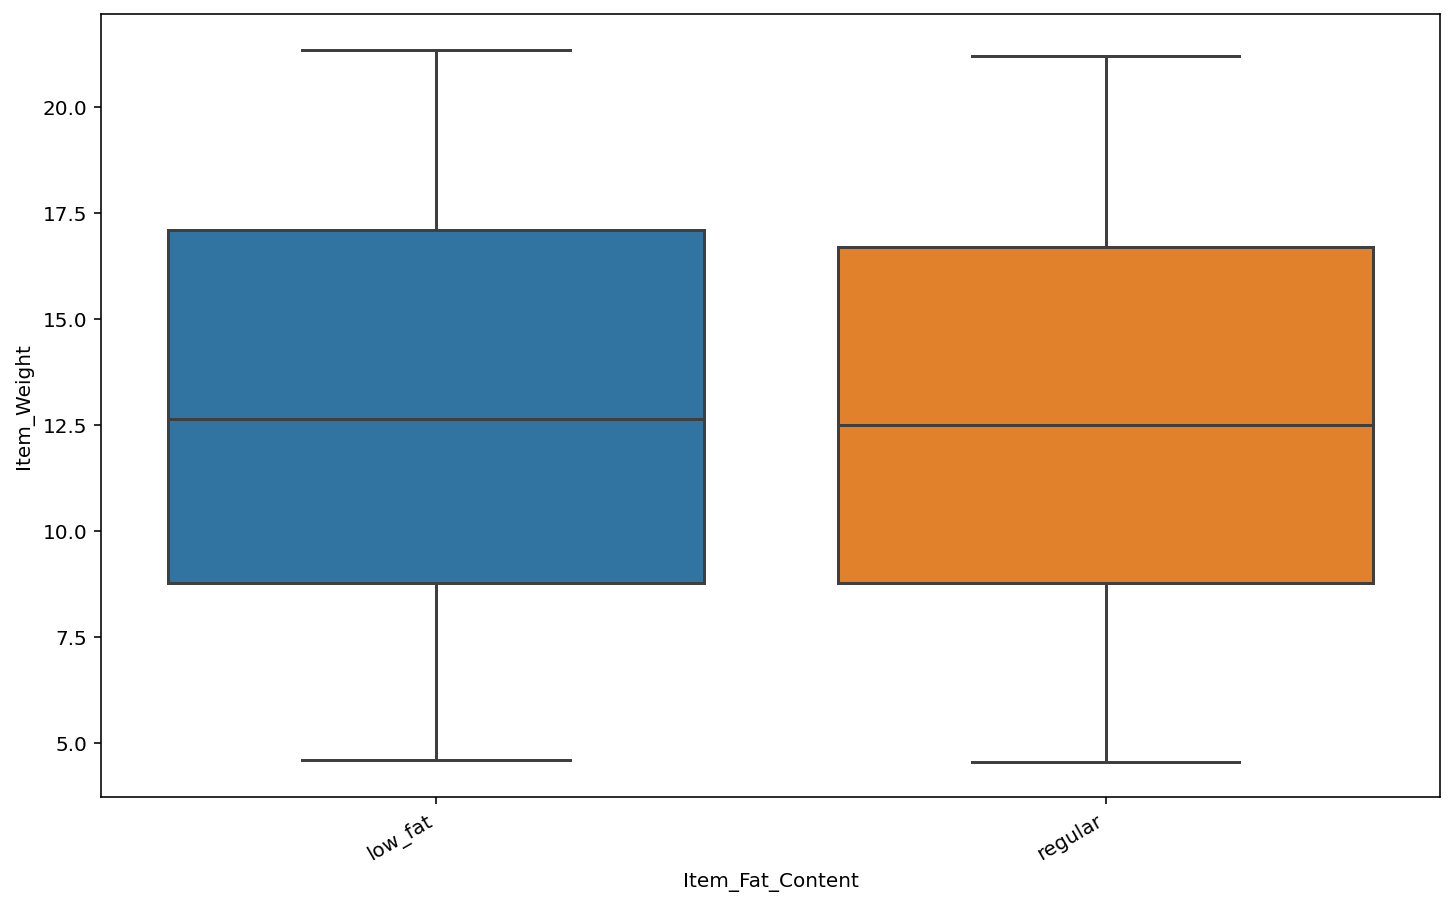

In [ ]:
fig = figure_size(12, 8)
sns.boxplot(x='Item_Fat_Content',y='Item_Weight',data=df, )
fig.autofmt_xdate()


### 21. ใช้ plotly พล็อต pie chart ของ target กับชนิดของสินค้า

In [ ]:
import plotly.express as px
fig = px.pie(df, values='Item_Outlet_Sales', names='Item_Type')
fig.show()

### 22. หาราคาเฉลี่ยของสินค้าแต่ละ ID


In [ ]:
df[['Item_Outlet_Sales', 'Item_Identifier']].groupby(['Item_Identifier']).mean()

Item_Outlet_Sales
Item_Identifier                   
DRA12                  1843.600200
DRA24                  2246.218971
DRA59                  2614.430150
DRB01                  1518.024000
DRB13                  2428.838400
DRB24                  3050.695600
DRB25                  1661.503900
DRB48                   622.903457
DRC01                   862.211000
DRC12                  2237.420900
DRC13                  1632.042250
DRC24                  3152.895900
DRC25                  1128.816343
DRC27                  2743.428900
DRC36                  3011.812880
DRC49                  2828.318400
DRD01                   851.025560
DRD12                  1576.709514
DRD13                  1232.681143
DRD15                  2522.811314
DRD24                  1965.156257
DRD25                  1740.234750
DRD27                  1269.813760
DRD37                   892.172000
DRD49                  3634.935100
DRD60                  2605.275400
DRE01                  2908.214400
DRE03                   648.298971
DRE12                  1546.875333
DRE13                  1552.512440
DRE15                  1151.168200
DRE25                  1472.749600
DRE27                   995.038100
DRE37                  1890.872000
DRE48                  3491.074743
DRE49                  2681.842400
DRE60                  4074.696000
DRF01                  1640.364750
DRF03                   548.286300
DRF13                  2685.171400
DRF15                   957.087500
DRF23                  2638.398950
DRF25                   784.692857
DRF27                  2182.159500
DRF36                  4490.488100
DRF37                  3068.228333
DRF48                  1496.718400
DRF49                  1347.246300
DRF51                   645.160200
DRF60                  4647.949800
DRG01                  1225.072000
DRG03                  2768.396400
DRG11                  1531.606320
DRG13                  3782.409800
DRG15                  1306.743467
DRG23                  1764.274886
DRG25                  4567.388000
DRG27                   519.856640
DRG36                  3593.322600
DRG37                  1646.998971
DRG39                   981.833067
DRG48                  2507.935440
DRG49                  3714.098720
DRG51                  2039.212240
DRH01                  2571.852240
DRH03                   745.696000
DRH11                   939.443800
DRH13                   809.612800
DRH15                   812.941800
DRH23                   795.764160
DRH25                   744.364400
DRH36                  1280.111467
DRH37                  2110.475033
DRH39                  1480.295333
DRH49                   557.274600
DRH51                   966.741600
DRH59                   634.729333
DRI01                  3103.959600
DRI03                  2811.506950
DRI11                  1398.655571
DRI13                  3147.236600
DRI23                  2674.296667
DRI25                   860.498943
DRI37                   644.494400
DRI39                  1279.001800
DRI47                  2277.036000
DRI49                  1421.483000
DRI51                  3349.639800
DRI59                  4586.030400
DRJ01                  1315.842733
DRJ11                  2917.345371
DRJ13                  2192.923267
DRJ23                  2874.125440
DRJ24                  1966.606750
DRJ25                  1022.335900
DRJ35                   706.857667
DRJ37                  2934.846400
DRJ39                  4271.439900
DRJ47                  3202.498000
DRJ49                  1963.311040
DRJ51                  3593.722080
DRJ59                   469.832867
DRK01                  1418.154000
DRK11                  1615.674667
DRK12                   491.027500
DRK13                  3703.623467
DRK23                  5464.886400
DRK35                   602.465775
DRK37                  3567.356400
DRK39                  1647.855000
DRK47                  3242.845480
DRK49                   591.801086
DRK59                  2265

In [ ]:
priceAverageById = df[['Item_Outlet_Sales', 'Item_Identifier']].groupby(['Item_Identifier']).mean()
priceAverageById['Item_Outlet_Sales'].sort_values(ascending=True)

Item_Identifier
NCR42     110.966667
FDQ60     120.509800
FDQ04     261.437467
FDX10     291.121050
NCN29     311.061760
NCL41     334.675467
NCO06     345.217300
FDF38     385.831100
FDT02     388.161400
FDX38     393.088320
FDN49     399.480000
FDS40     408.040286
FDF09     422.561067
NCE31     437.097700
NCL07     439.428000
NCD55     440.426700
FDY40     443.422800
FDD53     444.621240
NCR30     447.417600
FDD51     452.744000
FDS22     454.075600
NCO14     455.007720
FDU21     455.977886
FDG10     458.070400
NCT30     464.839367
FDY12     465.527360
FDP12     465.793680
FDX03     467.835467
DRJ59     469.832867
FDS21     470.587440
FDE59     473.383800
FDZ27     479.376000
FDV28     480.232029
FDV16     485.082857
FDT04     487.099280
FDL52     487.936286
FDH45     488.475267
FDA13     488.613975
DRK12     491.027500
FDW35     496.353900
FDH28     498.101625
NCD43     499.682900
FDC20     503.344800
DRY23     504.232533
FDX40     513.046457
FDG59     514.885333
FDE51     516.1852

### 23. ใช้ plotly พล็อต scatter plot โดยให้แกน X เป็น ID ของสินค้า 10 ตัวแรก        Y เป็นยอดขาย และขนาดเท่ากับน้ำหนักของสินค้า และสีเท่ากับ Item_Visibility


In [ ]:
df_10_item = df.head(10)
fig = px.scatter(df_10_item, x="Item_Identifier", y="Item_Outlet_Sales", size='Item_Visibility')
fig.show()

In [ ]:
priceAverageById = df[['Item_Outlet_Sales', 'Item_Identifier']].groupby(['Item_Identifier']).mean()

In [ ]:
modified = priceAverageById.reset_index()
modified.head(10)

Item_Identifier  Item_Outlet_Sales
0           DRA12        1843.600200
1           DRA24        2246.218971
2           DRA59        2614.430150
3           DRB01        1518.024000
4           DRB13        2428.838400
5           DRB24        3050.695600
6           DRB25        1661.503900
7           DRB48         622.903457
8           DRC01         862.211000
9           DRC12        2237.420900

In [ ]:
fig = px.scatter(modified.head(10), x="Item_Identifier", y="Item_Outlet_Sales")
fig.show()

### 24. แสดง dataframe ที่ outlet_type มีแค่ Grocery Store โดยใช้  1) pandas index และ 2) groupby


In [ ]:
dfGroceryStore = df[df['Outlet_Type'] == 'Grocery Store']
dfGroceryStore

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          regular         0.000000   
23             FDC37          NaN          low_fat         0.057557   
28             FDE51        5.925          regular         0.161467   
29             FDC14          NaN          regular         0.072222   
30             FDV38       19.250          low_fat         0.170349   
45             FDM39        6.420          low_fat         0.089499   
49             FDS02          NaN          regular         0.255395   
59             FDI26          NaN          low_fat         0.061082   
63             FDY40          NaN          regular         0.150286   
65             FDC46       17.700          low_fat         0.195068   
77             FDN48          NaN          low_fat         0.113720   
83             NCL18          NaN          low_fat         0.293418   
90             FDW20       20.750          low_fat         0.040421   
95             FDU04          NaN          low_fat         0.009715   
108            DRE60          NaN          low_fat         0.278974   
112            FDW39          NaN          regular         0.064625   
122            FDB14       20.250          regular         0.171939   
133            FDS52        8.890          low_fat         0.009163   
139            NCN07       18.500          low_fat         0.056816   
174            FDI32       17.700          low_fat         0.291865   
175            FDR47       17.850          low_fat         0.000000   
177            NCU05       11.800          low_fat         0.098312   
178            DRY23          NaN          regular         0.191014   
182            NCO17          NaN          low_fat         0.128478   
186            FDO08          NaN          regular         0.094154   
205            FDF24       15.500          regular         0.042465   
208            FDS45          NaN          regular         0.051644   
209            FDX40       12.850          low_fat         0.165694   
214            NCZ54       14.650          low_fat         0.000000   
215            FDE10        6.670          regular         0.150555   
216            FDR44        6.110          regular         0.000000   
217            FDP28       13.650          regular         0.134976   
225            NCO07          NaN          low_fat         0.017117   
227            DRF27          NaN          low_fat         0.049755   
236            FDS46          NaN          regular         0.082741   
250            DRF15          NaN          low_fat         0.058153   
255            FDQ04          NaN          low_fat         0.148393   
278            FDK21        7.905          low_fat         0.016759   
284            FDJ08          NaN          low_fat         0.193773   
286            FDE08       18.200          low_fat         0.082551   
301            FDV20          NaN          regular         0.104705   
317            FDC08       19.000          regular         0.173154   
325            NCK19        9.800          low_fat         0.151421   
334            FDC41          NaN          low_fat         0.204700   
344            FDJ22          NaN          low_fat         0.092464   
364            FDX26          NaN          low_fat         0.153741   
371            NCW53          NaN          low_fat         0.053393   
387            FDT57       15.200          low_fat         0.031860   
393            FDU02          NaN          low_fat         0.179484   
405            FDW24          NaN          low_fat         0.065652   
411            NCZ42       10.500          low_fat         0.000000   
417            FDW35          NaN          low_fat         0.019416   
420            FDR04        7.075          low_fat         0.037772   
430            FDW23          NaN          low_fat         0.143593   
433            DRH03          NaN          low_fat         0.061393   
434            FDW27         

In [ ]:
df.groupby(df['Outlet_Type']).get_group('Grocery Store')

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          regular         0.000000   
23             FDC37          NaN          low_fat         0.057557   
28             FDE51        5.925          regular         0.161467   
29             FDC14          NaN          regular         0.072222   
30             FDV38       19.250          low_fat         0.170349   
45             FDM39        6.420          low_fat         0.089499   
49             FDS02          NaN          regular         0.255395   
59             FDI26          NaN          low_fat         0.061082   
63             FDY40          NaN          regular         0.150286   
65             FDC46       17.700          low_fat         0.195068   
77             FDN48          NaN          low_fat         0.113720   
83             NCL18          NaN          low_fat         0.293418   
90             FDW20       20.750          low_fat         0.040421   
95             FDU04          NaN          low_fat         0.009715   
108            DRE60          NaN          low_fat         0.278974   
112            FDW39          NaN          regular         0.064625   
122            FDB14       20.250          regular         0.171939   
133            FDS52        8.890          low_fat         0.009163   
139            NCN07       18.500          low_fat         0.056816   
174            FDI32       17.700          low_fat         0.291865   
175            FDR47       17.850          low_fat         0.000000   
177            NCU05       11.800          low_fat         0.098312   
178            DRY23          NaN          regular         0.191014   
182            NCO17          NaN          low_fat         0.128478   
186            FDO08          NaN          regular         0.094154   
205            FDF24       15.500          regular         0.042465   
208            FDS45          NaN          regular         0.051644   
209            FDX40       12.850          low_fat         0.165694   
214            NCZ54       14.650          low_fat         0.000000   
215            FDE10        6.670          regular         0.150555   
216            FDR44        6.110          regular         0.000000   
217            FDP28       13.650          regular         0.134976   
225            NCO07          NaN          low_fat         0.017117   
227            DRF27          NaN          low_fat         0.049755   
236            FDS46          NaN          regular         0.082741   
250            DRF15          NaN          low_fat         0.058153   
255            FDQ04          NaN          low_fat         0.148393   
278            FDK21        7.905          low_fat         0.016759   
284            FDJ08          NaN          low_fat         0.193773   
286            FDE08       18.200          low_fat         0.082551   
301            FDV20          NaN          regular         0.104705   
317            FDC08       19.000          regular         0.173154   
325            NCK19        9.800          low_fat         0.151421   
334            FDC41          NaN          low_fat         0.204700   
344            FDJ22          NaN          low_fat         0.092464   
364            FDX26          NaN          low_fat         0.153741   
371            NCW53          NaN          low_fat         0.053393   
387            FDT57       15.200          low_fat         0.031860   
393            FDU02          NaN          low_fat         0.179484   
405            FDW24          NaN          low_fat         0.065652   
411            NCZ42       10.500          low_fat         0.000000   
417            FDW35          NaN          low_fat         0.019416   
420            FDR04        7.075          low_fat         0.037772   
430            FDW23          NaN          low_fat         0.143593   
433            DRH03          NaN          low_fat         0.061393   
434            FDW27         

### 25. แสดง dataframe ที่ ชนิดของสินค้าคือน้ำอัดลมและขนาดของ outlet คือเล็ก (hint: ใช้ bitwise operator)


In [ ]:
df[(df['Item_Type'] == 'Soft Drinks') & ( df['Outlet_Size'] == 'Small')]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
34             DRH01       17.500          low_fat         0.097904   
108            DRE60          NaN          low_fat         0.278974   
126            DRI49       14.150          low_fat         0.183507   
163            DRF49        7.270          low_fat         0.071078   
178            DRY23          NaN          regular         0.191014   
210            DRK12        9.500          low_fat         0.041878   
261            DRK01        7.630          low_fat         0.061053   
353            DRI01        7.970          low_fat         0.034453   
389            DRE49       20.750          low_fat         0.021250   
509            DRN36          NaN          low_fat         0.087855   
544            DRG01       14.800          low_fat         0.044870   
576            DRB48       16.750          regular         0.000000   
577            DRE25       15.350          low_fat         0.073269   
599            DRK37        5.000          low_fat         0.044005   
754            DRE13        6.280          low_fat         0.027700   
776            DRB25       12.300          low_fat         0.069447   
813            DRD49        9.895          low_fat         0.167799   
833            DRD60          NaN          low_fat         0.065189   
940            DRL37       15.500          low_fat         0.053362   
1046           DRK37          NaN          low_fat         0.077047   
1147           DRN36       15.200          low_fat         0.050168   
1177           DRH01          NaN          low_fat         0.171417   
1185           DRH37          NaN          low_fat         0.072865   
1204           DRH49          NaN          low_fat         0.043169   
1226           DRY23        9.395          regular         0.109076   
1252           DRE37          NaN          low_fat         0.164966   
1253           DRC13        8.260          regular         0.032435   
1339           DRK13       11.800          low_fat         0.115168   
1364           DRF25        9.000          low_fat         0.038925   
1369           DRD24       13.850          low_fat         0.030795   
1452           DRI25       19.600          low_fat         0.033901   
1515           DRE12        4.590          low_fat         0.070781   
1561           DRK49       14.150          low_fat         0.035944   
1693           DRA12       11.600          low_fat         0.000000   
1708           DRC25          NaN          low_fat         0.079440   
1725           DRM48       15.200          low_fat         0.112897   
1737           DRD60       15.700          low_fat         0.037225   
1796           DRD01       12.100          regular         0.061164   
1836           DRB13        6.115          regular         0.007043   
1872           DRF36       16.100          low_fat         0.023577   
1876           DRA59        8.270          regular         0.127928   
1913           DRK49          NaN          low_fat         0.000000   
1918           DRB48       16.750          regular         0.024849   
2148           DRJ37       10.800          low_fat         0.061101   
2169           DRG48        5.780          low_fat         0.014555   
2217           DRE49       20.750          low_fat         0.000000   
2300           DRG37       16.200          low_fat         0.019375   
2401           DRJ24          NaN          low_fat         0.198425   
2486           DRH13          NaN          low_fat         0.041821   
2591           DRD12        6.960          low_fat         0.077194   
2606           DRH25       18.700          low_fat         0.000000   
2640           DRJ01        6.135          low_fat         0.115032   
2671           DRC25        5.730          low_fat         0.045372   
2724           DRY23        9.395          regular         0.109096   
2733           DRH49       19.700          low_fat         0.024656   
2766           DRD25         

26. bitwise operator ต่างกับ logical operator อย่างไร (อ้างอิงจากข้อ 25 ได้)


*logical operator จะพิจารณาตัวต่อตัว*
*bitwise operator จะพิจารณาเมื่อต้องการเทียบหลายตัว ([0, 0, 1] & [1, 0, 1] = [0, 0, 1]*

### 27. เช็คและแปลงข้อมูลให้อยู่ในรูปแบบที่เหมาะสม (hint: แปลง data dtype บางคอลัมน์)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*Outlet_Establishment_Year   from  INT64 --> Category*

In [ ]:
Outlet_Establishment_Year  

NameError: ignored

In [ ]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [ ]:
df.info()

### 28. สร้าง heatmap แสดงข้อมูลที่หายไปของแต่ละ colum(สามารถย้อนไปดู titanic dataset ได้)



In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='GnBu_r')

### 29. เช็คว่ามีข้อมูลที่หายไปไหม ถ้าเป็นตัวเลขให้ใส่ด้วยค่าเฉลี่ย ถ้าเป็น Categorical ให้ใส่ด้วย Category อันที่มีความถี่สูงที่สุด


In [ ]:
df.info()

In [ ]:
average = df['Item_Weight'].mean()

In [ ]:
df['Item_Weight'].fillna(value=average, inplace = True)

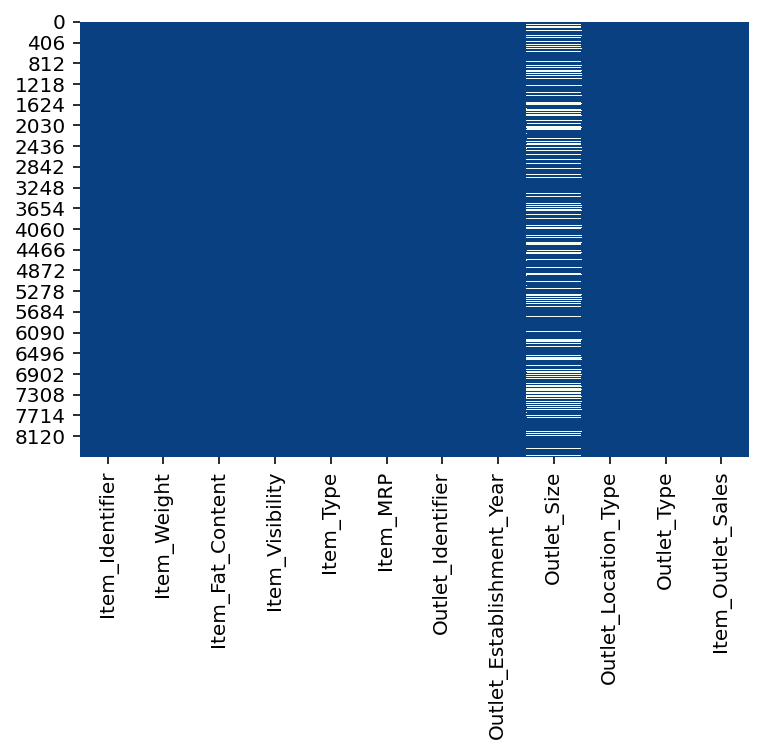

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='GnBu_r')

In [ ]:
df['Outlet_Size'].fillna(value='Medium', inplace = True)

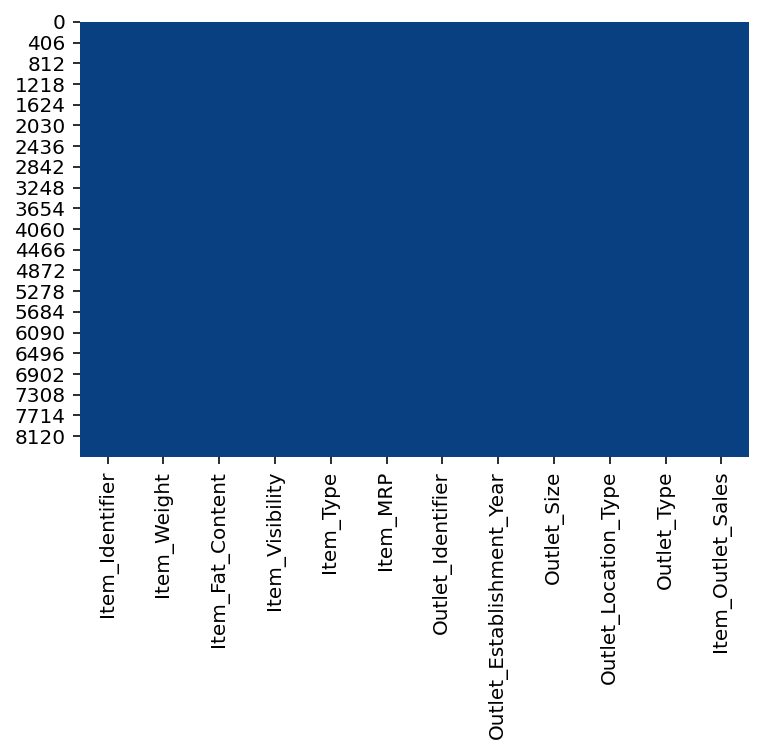

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='GnBu_r')

### 30. drop ข้อมูลที่คิดว่าไม่มีผลต่อยอดขายออก และให้เหตุผลว่าทำไม


In [ ]:
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          low_fat         0.016047   
1           DRC01     5.920000          regular         0.019278   
2           FDN15    17.500000          low_fat         0.016760   
3           FDX07    19.200000          regular         0.000000   
4           NCD19     8.930000          low_fat         0.000000   
5           FDP36    10.395000          regular         0.000000   
6           FDO10    13.650000          regular         0.012741   
7           FDP10    12.857645          low_fat         0.127470   
8           FDH17    16.200000          regular         0.016687   
9           FDU28    19.200000          regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002      Medium               Tier 2   
9                       2007      Medium               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [ ]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)


In [ ]:
df.sample(10)

Item_Weight Item_Fat_Content  Item_Visibility           Item_Type  \
4265    15.350000          low_fat         0.023466        Frozen Foods   
4577    15.000000          low_fat         0.058725         Snack Foods   
6613     8.630000          regular         0.032961         Snack Foods   
3866    12.857645          low_fat         0.025164  Health and Hygiene   
2799    20.200000          low_fat         0.099893           Household   
5620    18.700000          low_fat         0.089777         Snack Foods   
3292    17.700000          low_fat         0.050929           Household   
7407    17.600000          low_fat         0.018935  Health and Hygiene   
6696    12.857645          low_fat         0.015945               Dairy   
6402    15.000000          regular         0.161435              Canned   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
4265   35.2190                       1998      Medium               Tier 3   
4577   43.6744                       2007      Medium               Tier 2   
6613  115.0518                       1999      Medium               Tier 1   
3866  152.6024                       1985      Medium               Tier 3   
2799  187.6898                       2004       Small               Tier 2   
5620  256.4672                       2007      Medium               Tier 2   
3292  129.1678                       2004       Small               Tier 2   
7407  237.7590                       1999      Medium               Tier 1   
6696  249.5092                       1985      Medium               Tier 3   
6402  185.1266                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
4265      Grocery Store            36.6190  
4577  Supermarket Type1           407.4696  
6613  Supermarket Type1          1366.2216  
3866  Supermarket Type3          6072.0960  
2799  Supermarket Type1          3928.8858  
5620  Supermarket Type1          5369.0112  
3292  Supermarket Type1          1780.3492  
7407  Supermarket Type1          3545.3850  
6696  Supermarket Type3          6474.2392  
6402  Supermarket Type1          2766.3990

### 31. Print ยอดขายที่มากสุดและน้อยสุดใน dataframe



In [ ]:
print(df['Item_Outlet_Sales'].max())
print(df['Item_Outlet_Sales'].min())


13086.9648
33.29


# Model Building

### Library Importing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler

### 32. ทำ dummies สำหรับ Categorical data และ สร้าง train/test split ด้วย 80:20 ratio


In [ ]:
df_real = pd.get_dummies(df, drop_first=True)

In [ ]:
df_real.sample(10)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
7739       12.800         0.076046   96.5410                       2004   
2047       16.500         0.012663   39.3506                       2002   
501         8.895         0.026385  208.9954                       1999   
5785       11.650         0.033830  111.6860                       1987   
8265       20.600         0.045675  150.9392                       2007   
6252        4.920         0.045917  198.8084                       1987   
2034       10.695         0.063751   36.7848                       2004   
3715       20.750         0.108879  161.5578                       1999   
2953       16.500         0.079714  101.3332                       1997   
6445        8.680         0.008836   96.5384                       1997   

      Item_Outlet_Sales  Item_Fat_Content_regular  Item_Type_Breads  \
7739          3765.0990                         0                 0   
2047           645.1602                         0                 0   
501           4584.6988                         0                 0   
5785          1584.6040                         0                 0   
8265          4026.7584                         0                 0   
6252          2976.1260                         0                 0   
2034           782.9808                         0                 0   
3715           320.9156                         0                 0   
2953          1537.9980                         1                 0   
6445          1182.4608                         0                 0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
7739                    0                 0                0   
2047                    0                 0                0   
501                     0                 0                0   
5785                    0                 0                0   
8265                    0                 0                0   
6252                    0                 0                0   
2034                    0                 0                0   
3715                    0                 0                0   
2953                    0                 0                0   
6445                    0                 0                0   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
7739                       0                                1   
2047                       0                                0   
501                        1                                0   
5785                       0                                0   
8265                       0                                0   
6252                       0                                0   
2034                       0                                0   
3715                       0                                0   
2953                       0                                1   
6445                       1                                0   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  \
7739                      0                             0   
2047                      0                             1   
501                       0                             0   
5785                      0                             0   
8265                      0                             1   
6252                      0                             0   
2034                      0                             0   
3715                      0                             0   
2953                      0                             0   
6445                      0                             0   

      Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
7739                    0               0                 0   
2047                    0               0                 0   
501                     0               0                 0   
5785                    0               0            

In [ ]:
X = df['Item_MRP']
y = df['Item_Outlet_Sales']

In [ ]:
print(X.shape)
print(y.shape)


(8523,)
(8523,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=25)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818,)
(1705,)
(6818,)
(1705,)


In [ ]:
X_train = np.array(X_train).reshape(-1, 1)
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(6818, 1)

In [ ]:
X_test = np.array(X_test).reshape(-1, 1)
X_test.shape

(1705, 1)

## 33. สร้างโมเดลแบบ Simple Linear Regression โดยใช้ Item_MRP เป็น independent variable เพียงตัวเดียว


In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 34.  แสดงค่า intercept และ coefficient พร้อมกับอธิบายทั้งสองค่าว่าคืออะไรและหมายความว่าอย่างไร


In [ ]:
print('Intercept : ', lm.intercept_)
print('Coefficient', lm.coef_)

Intercept :  -7.9508358975049305
Coefficient [15.50082855]


*Intecept คือค่าที่เป็น constant ของ linear equation เมื่อ x = 0 ค่า  y จะเท่ากับ ค่า Intercept *
*Coefficient is slope คือ อัตราการก้าวกระโดดของ x *



In [ ]:
from sklearn import metrics

## 35. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2


In [ ]:
predicted = lm.predict(X_test)
predicted

array([3273.91248586,  517.37224361, 2431.8361753 , ..., 2398.75430702,
       2345.11213974, 1668.12275339])

In [ ]:
MAE = metrics.mean_absolute_error(y_test, predicted)
MSE = metrics.mean_squared_error(y_test, predicted)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predicted))
R2 = metrics.r2_score(y_test, predicted)
print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)
print('R2', R2 )

MAE 1060.2835921132823
MSE 2066446.0997912516
RMSE 1437.5138607301328
R2 0.3086487668674315


## 36. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย


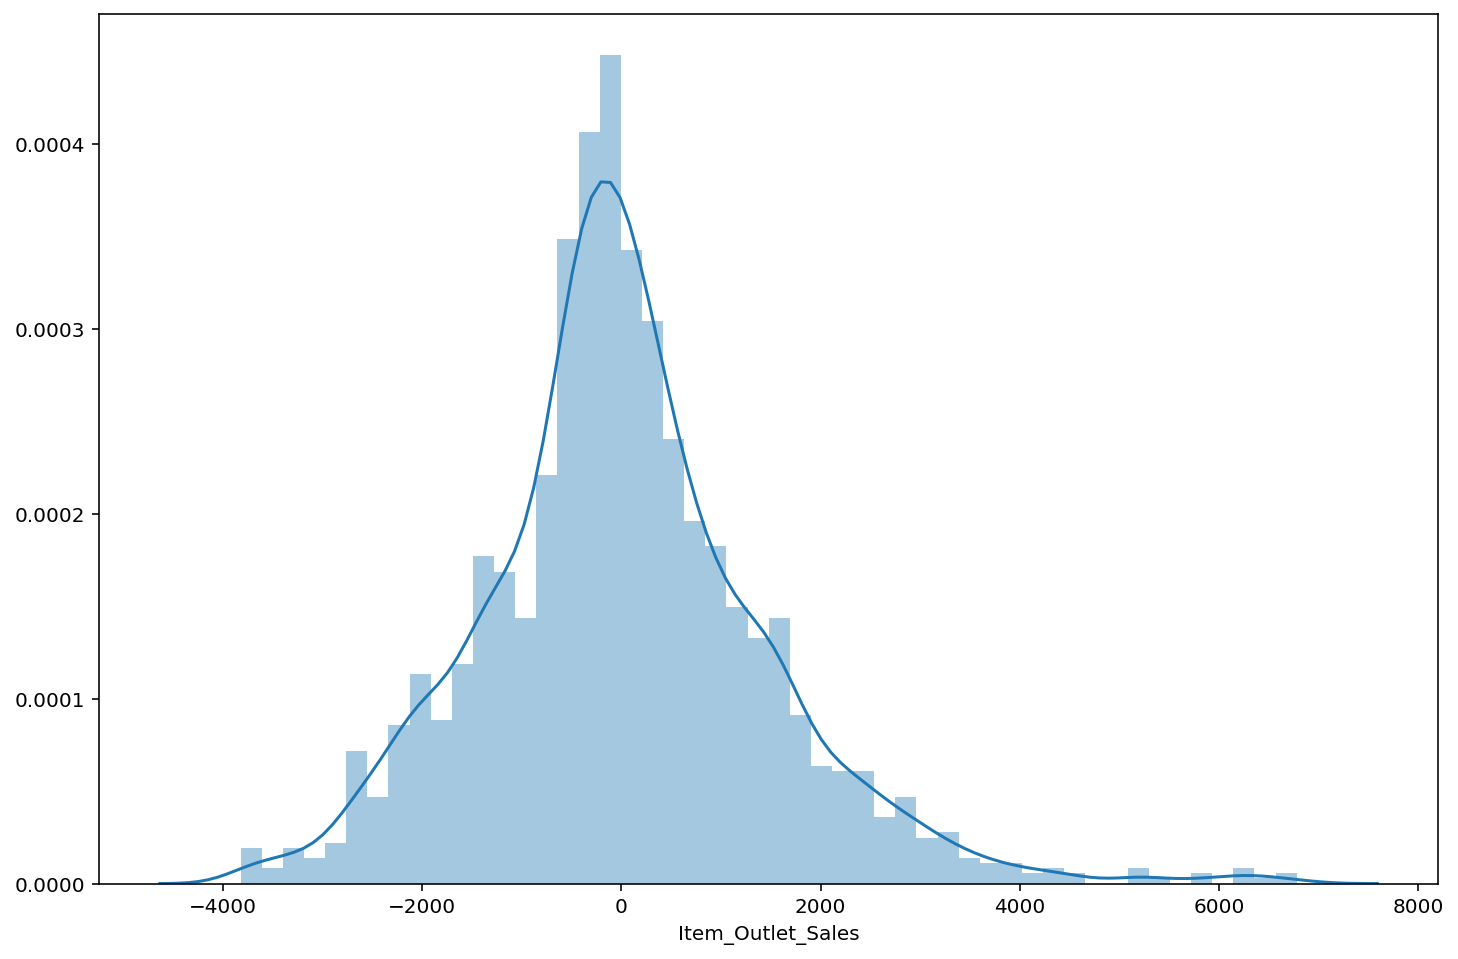

In [ ]:
#normal distribution checking 
fig = figure_size(12, 8)
sns.distplot(y_test-predicted, bins=50)

*ถ้าออกมาในลักษณะของ Normal Distribution มากนั่นหมายความว่าค่า real - predicted นั้นใกล้กับศูนย์มาก*
**คลาดเคลื่อนน้อยเยอะ**

In [ ]:
dict_compare  = {'Sales' : y_test, 'predicted' : predicted}

df_predicted = pd.DataFrame(dict_compare)
df_predicted

Sales    predicted
597    5770.4886  3273.912486
3586     99.8700   517.372244
2552   1869.5664  2431.836175
2017    756.3488  2937.008178
1417   2768.3964  3041.722475
6772   2290.3520  2186.144943
1596   1733.0774  1392.000294
7156   2908.8802  2664.556315
8498   1601.2490  1923.033879
3015   2223.1062  1633.000976
6434   4374.3060  2230.526915
2442   2848.9582  3998.954441
7683   1072.6038  1864.211335
6745   6050.7904  2926.157598
1089   1006.6896  1749.136284
3800   1325.6078  1864.701161
8050   4175.8976  4026.815630
8253   2896.8958  2380.233917
5255   4261.1200  3300.794023
4708    455.4072   560.163831
5455    982.7208  3812.696485
3402   2580.6408  2321.860897
3756   5552.1062  2758.950160
7068   2410.1960  1877.101824
5277   1332.9316  1488.024827
1806    171.7764   899.759083
297    1418.1540  2184.105034
4689   3815.0340  3903.460036
8083   2920.1988  2668.676435
5486   3946.8624  2562.901881
562    1238.3880  1905.452839
5453    179.7660  2778.571109
7305    263.6568  2061.849999
2243   2037.3480  3532.004381
7092   1454.1072  1865.721115
7491   3175.8660  2753.320259
6866    647.8234  1446.743020
6405   1191.7820  1817.708849
4747   3263.7516  2623.724032
1963   2133.2232  1849.240634
1863   2530.7058  1856.950747
4062    534.6374   728.391223
7294   1930.8200  1514.866062
7638    412.7960  1605.669915
6760   1470.0864  1883.261853
4185   1644.5260  2542.750804
2022   2087.9488  1130.888837
6320   2526.7110  1183.551352
5241    531.3084   581.864991
7821    820.2656  1782.097246
1113   6767.1912  3758.524189
2592    447.4176   961.111362
5451   1134.5232  1451.352967
394    3259.7568  2958.138907
7684   5343.0450  3315.764723
1374   2518.7214   991.582891
6399   4277.7650  2663.006232
2028   3101.2964  2844.654241
8311   2467.4548  2249.658038
1497   3078.6592  2803.862261
7825   2572.6512  1889.462184
5828   1577.9460  2430.245790
4938    210.3928  1638.181353
1439   2246.4092  2456.026768
1062   5510.8266  2742.959505
79     5305.0944  3441.690354
7185   1225.0720  2393.654534
4854   4380.2982  4007.765112
7151   2466.7890  2567.552130
4891   6608.0650  4078.417888
5405   2929.5200  2841.023947
7486    503.3448  1286.225740
8340   5296.4390  2241.947925
1101   4832.3764  1940.004186
3911   5033.4480  3924.181544
7292   1713.1034   837.796071
2555   4301.0680  3344.156041
2263    633.8416   675.238882
6596   1705.1138  1995.726564
7636    575.2512   580.355210
6920    777.6544   748.542300
563     319.5840  2439.505985
4816   4483.4972  2665.046141
338    1992.0736  1897.172297
3269    471.3864  2423.025504
1827    245.0144  1915.813593
4064   1989.4104  3407.588531
487      75.2354  1139.659206
5924   2586.6330  2644.895064
5254   3974.8260  4125.940328
1954   4250.4672  3489.172492
1111    705.7480   565.384510
3375    352.8740  2705.267691
8430   4042.7376  2811.042245
4921   4579.3724  3726.502578
5294   1071.9380  2351.802297
7700    970.7364  1679.463160
2361    615.1992  1331.097539
3690   4757.8068  4093.918717
517     372.8480   712.930697
3319   2614.5966  1949.875114
2308    640.4996   732.511343
718    2358.2636  2581.422271
5302   4376.9692  1748.035725
2325    113.8518  1781.647722
2339   1528.0110  1602.079923
6381    575.2512  1451.842793
7676   3185.8530  1702.674100
5863   2387.5588  3376.667478
392     796.9626  1364.669233
1774   3787.0704  2419.395210
6975    966.7416  1220.672736
7937   2362.9242  2838.984038
1347   2874.9244  2602.593303
1376   1151.1682  2517.949478
2282   6439.6176  3843.657840
6541  10306.5840  3526.783702
7739   3765.0990  1488.514653
554    4916.2672  2947.858758
1038    862.8768   580.355210
769    3006.0870  2223.346931
4120   1076.5986   788.274024
8319   4210.5192  3803.355686
7340   1618.5598  2289.919890
3127   2073.3012  1749.585808
8180   3174.5344  3095.445246
1284   3014.7424  2909.636815
2252    283.6308  2171.704371
7421   3575.3460  3691.421102
3534   1877.5560  2928.767937
7014   6424.9700  3977.293583
924     251.6724  3874.578893
7843   3418.8830  403

In [ ]:
df_predicted.corr()

Sales  predicted
Sales      1.000000   0.555746
predicted  0.555746   1.000000

In [ ]:
print(df_predicted.to_string())

           Sales    predicted
597    5770.4886  3273.912486
3586     99.8700   517.372244
2552   1869.5664  2431.836175
2017    756.3488  2937.008178
1417   2768.3964  3041.722475
6772   2290.3520  2186.144943
1596   1733.0774  1392.000294
7156   2908.8802  2664.556315
8498   1601.2490  1923.033879
3015   2223.1062  1633.000976
6434   4374.3060  2230.526915
2442   2848.9582  3998.954441
7683   1072.6038  1864.211335
6745   6050.7904  2926.157598
1089   1006.6896  1749.136284
3800   1325.6078  1864.701161
8050   4175.8976  4026.815630
8253   2896.8958  2380.233917
5255   4261.1200  3300.794023
4708    455.4072   560.163831
5455    982.7208  3812.696485
3402   2580.6408  2321.860897
3756   5552.1062  2758.950160
7068   2410.1960  1877.101824
5277   1332.9316  1488.024827
1806    171.7764   899.759083
297    1418.1540  2184.105034
4689   3815.0340  3903.460036
8083   2920.1988  2668.676435
5486   3946.8624  2562.901881
562    1238.3880  1905.452839
5453    179.7660  2778.571109
7305    26

## 37. สร้าง scatter plot และ prediction line ของ simple linear regression


(0.0, 13500.0)

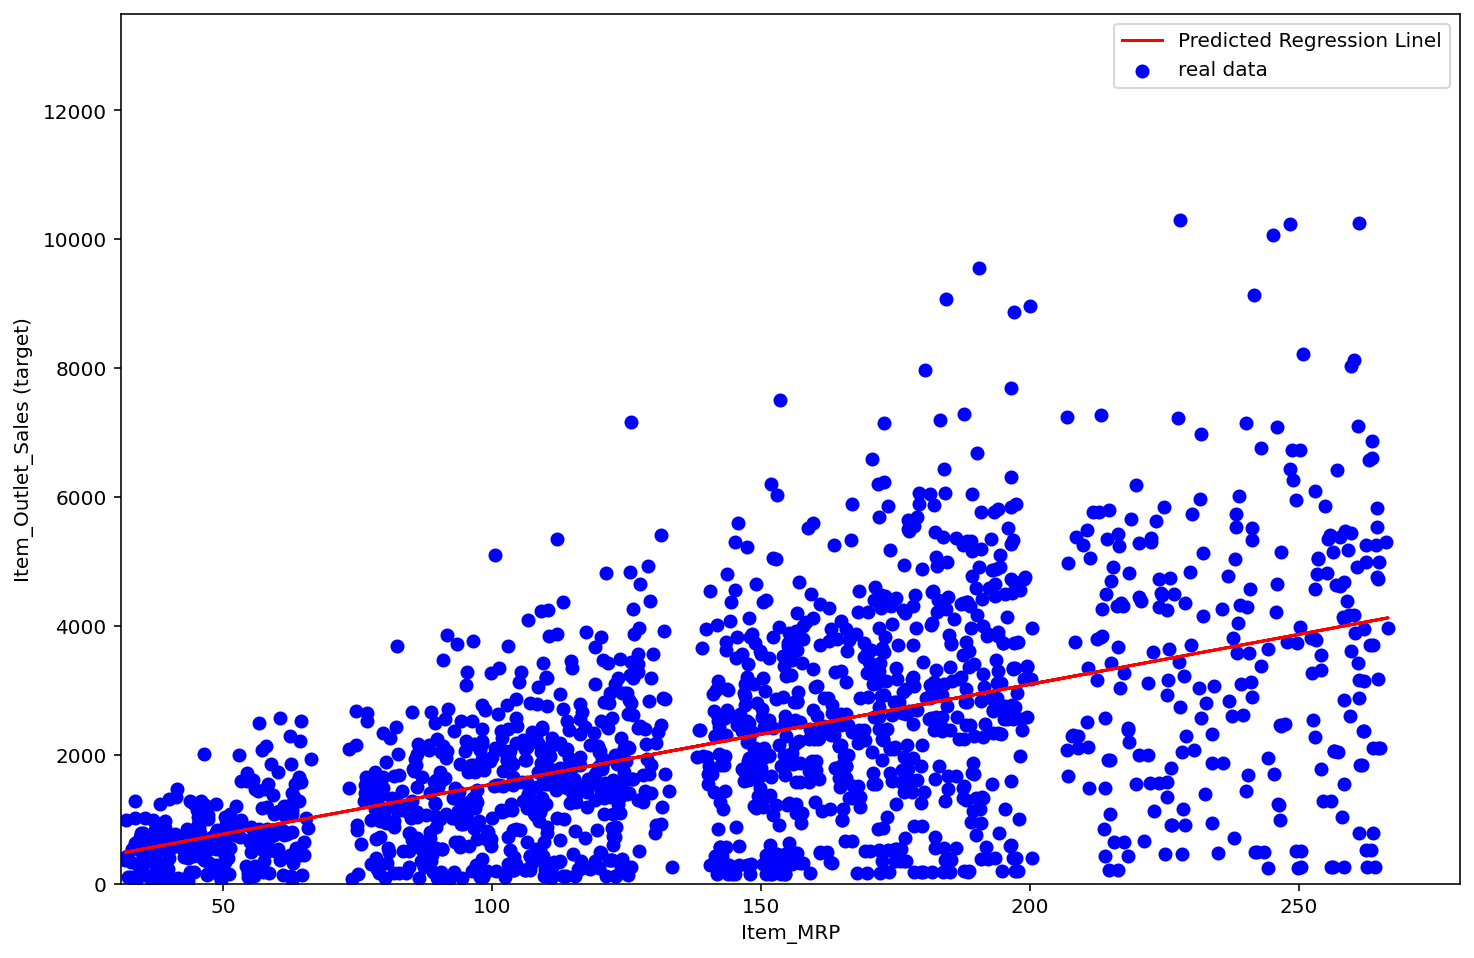

In [ ]:
fig = figure_size(12, 8)
plt.scatter(X_test, y_test,  color='blue', label='real data')
plt.plot(X_test, predicted, color='red', label='Predicted Regression Linel')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales (target)')
plt.legend()
plt.xlim([31, 280])
plt.ylim([0, 13500])

## 39.  ใช้ Standard Scaler ในการทำ feature scaling ทั้งแกน X และ Y


In [ ]:
from sklearn.preprocessing  import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
X = sc_X.fit_transform(np.array(X).reshape(-1, 1))
y = sc_y.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=25)

In [ ]:
### pairing X_test and y_test for data visualization of SVR
X_test

array([[ 1.13581842],
       [-1.71993499],
       [ 0.26343417],
       ...,
       [ 0.22916162],
       [ 0.17358877],
       [-0.52776676]])

In [ ]:
y_train

array([[-0.6118746 ],
       [ 0.49193972],
       [-0.59704783],
       ...,
       [ 0.17004265],
       [-0.29504985],
       [ 2.93094406]])

In [ ]:
pair = dict(zip(X_test.flatten(), y_test.flatten()))

In [ ]:
pair = dict(sorted(pair.items()))

In [ ]:
pair

{-1.7520524528356092: -1.0637010337450405,
 -1.7509957881996914: -0.7012254238375909,
 -1.7488407062218774: -1.0246832070596317,
 -1.742966421665362: -1.2186018056861143,
 -1.7365429284378986: -1.0793081644192042,
 -1.7349370551310326: -1.2186018056861143,
 -1.731725308517301: -0.9599136147618526,
 -1.727964353232621: -1.2587901671720856,
 -1.7247943593248678: -0.9060690139359882,
 -1.723188486018002: -0.6785950843600536,
 -1.722639277347054: -0.5275960950875208,
 -1.7199767394042702: -1.2576196323715232,
 -1.7199349866982918: -1.2197723404866767,
 -1.712496581540889: -1.130811695643944,
 -1.7092848349271572: -1.0886724428237022,
 -1.7076789616202914: -0.8569065523123729,
 -1.706031335607447: -0.8206199734949424,
 -1.7049746709715294: -1.156563461256314,
 -1.7034105503706418: -0.9993216197141157,
 -1.7028613416996936: -0.9622546843629771,
 -1.702819588993715: -0.9002163399331768,
 -1.7023121330287454: -1.1335429435119226,
 -1.7007062597218798: -1.0715045990821224,
 -1.699649595085962: 

In [ ]:
list(pair.keys())

[-1.7520524528356092,
 -1.7509957881996914,
 -1.7488407062218774,
 -1.742966421665362,
 -1.7365429284378986,
 -1.7349370551310326,
 -1.731725308517301,
 -1.727964353232621,
 -1.7247943593248678,
 -1.723188486018002,
 -1.722639277347054,
 -1.7199767394042702,
 -1.7199349866982918,
 -1.712496581540889,
 -1.7092848349271572,
 -1.7076789616202914,
 -1.706031335607447,
 -1.7049746709715294,
 -1.7034105503706418,
 -1.7028613416996936,
 -1.702819588993715,
 -1.7023121330287454,
 -1.7007062597218798,
 -1.699649595085962,
 -1.6996078423799834,
 -1.6974945131081483,
 -1.6947902224593858,
 -1.6937753105294466,
 -1.691112772586663,
 -1.682492444675407,
 -1.6756032481889525,
 -1.675561495482974,
 -1.6745048308470563,
 -1.6707856282683546,
 -1.670194666891428,
 -1.6691797549614888,
 -1.6685887935845622,
 -1.6665172170187055,
 -1.6643621350408913,
 -1.6627562617340252,
 -1.6622488057690556,
 -1.66064293246219,
 -1.6600937237912419,
 -1.6600519710852633,
 -1.6584460977783975,
 -1.6568402244715315,
 -1

In [ ]:
X_test = np.array( list(pair.keys())).reshape(-1, 1)
X_test

array([[-1.75205245],
       [-1.75099579],
       [-1.74884071],
       ...,
       [ 1.99391682],
       [ 2.01048301],
       [ 2.01851238]])

In [ ]:
y_test = np.array( list(pair.values())).reshape(-1, 1)
y_test

array([[-1.06370103],
       [-0.70122542],
       [-1.02468321],
       ...,
       [-0.04221433],
       [ 1.82751992],
       [ 1.05106517]])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 1)
(1597, 1)
(6818, 1)
(1597, 1)


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 40. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2

In [ ]:
predictedSVR = regressor.predict(X_test)

In [ ]:
predicted_SVR = sc_y.inverse_transform(predictedSVR)
predicted_SVR

array([-0.96049765, -0.96034729, -0.96003542, ...,  0.88579489,
        0.87628839,  0.87145939])

In [ ]:
y_test = sc_y.inverse_transform(y_test)
y_test

array([[-1.06370103],
       [-0.70122542],
       [-1.02468321],
       ...,
       [-0.04221433],
       [ 1.82751992],
       [ 1.05106517]])

In [ ]:
MAE_SVR = metrics.mean_absolute_error(y_test, predicted_SVR)
MSE_SVR = metrics.mean_squared_error(y_test, predicted_SVR)
RMSE_SVR = np.sqrt(metrics.mean_squared_error(y_test, predicted_SVR))
R2_SVR = metrics.r2_score(y_test, predicted_SVR)
print('MAE', MAE_SVR)
print('MSE', MSE_SVR)
print('RMSE', RMSE_SVR)
print('R2', R2_SVR )

MAE 0.6163306933910145
MSE 0.7045182113231392
RMSE 0.8393558311724171
R2 0.3116500521811524


## 41. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results และอธิบายความหมาย


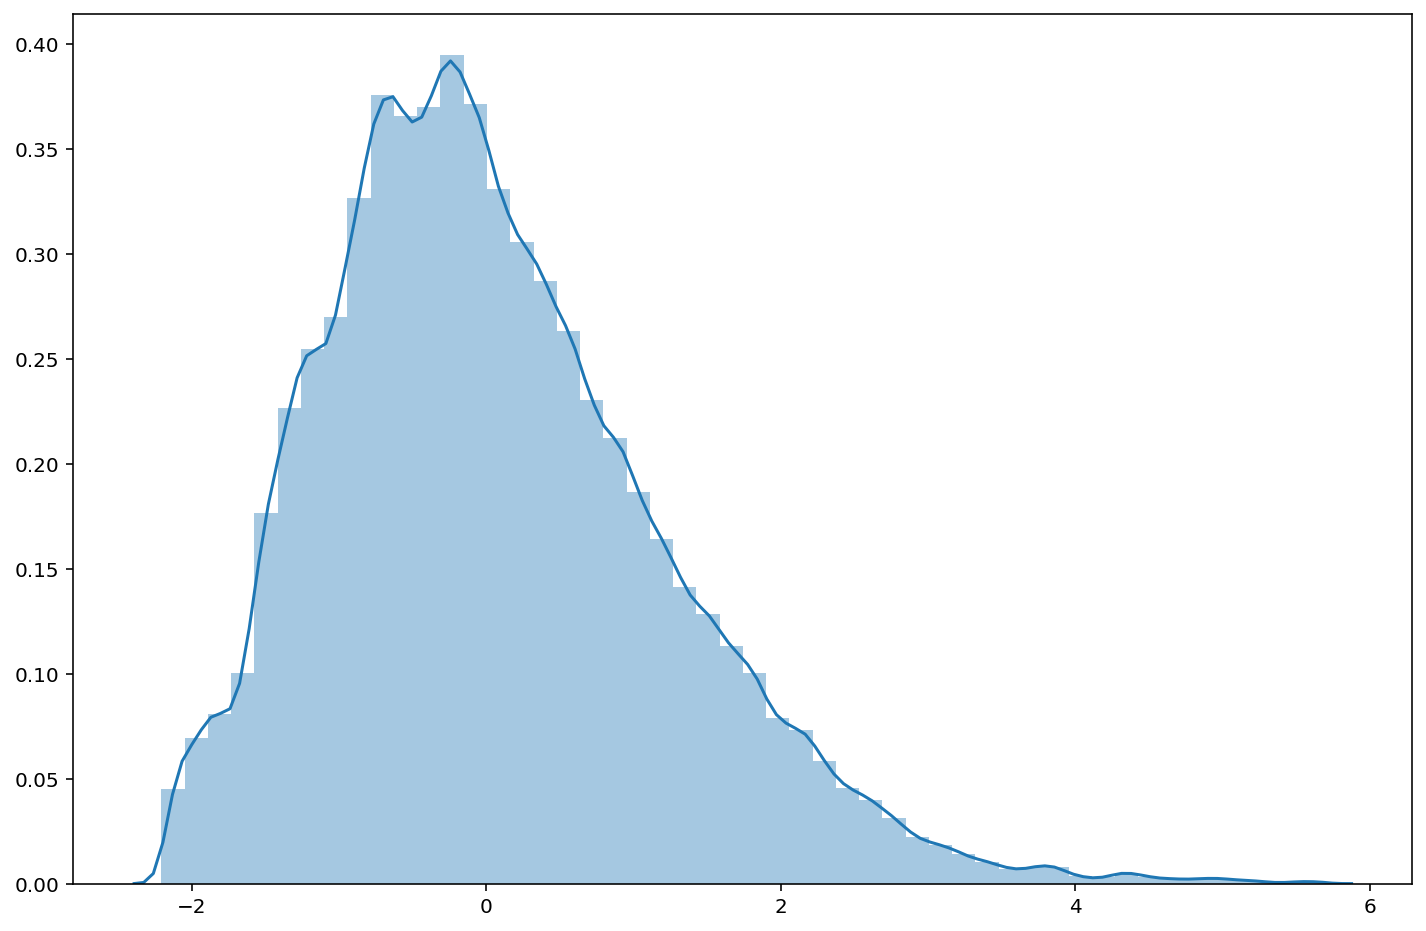

In [ ]:
#normal distribution checking 
fig = figure_size(12, 8)
sns.distplot(y_test-predicted_SVR, bins=50)

## 42. สร้าง scatter plot และ prediction line ของ RBF support vector regressor


In [ ]:
sc_X.inverse_transform(X_test)

array([[-1.75205245],
       [-1.75099579],
       [-1.74884071],
       ...,
       [ 1.99391682],
       [ 2.01048301],
       [ 2.01851238]])

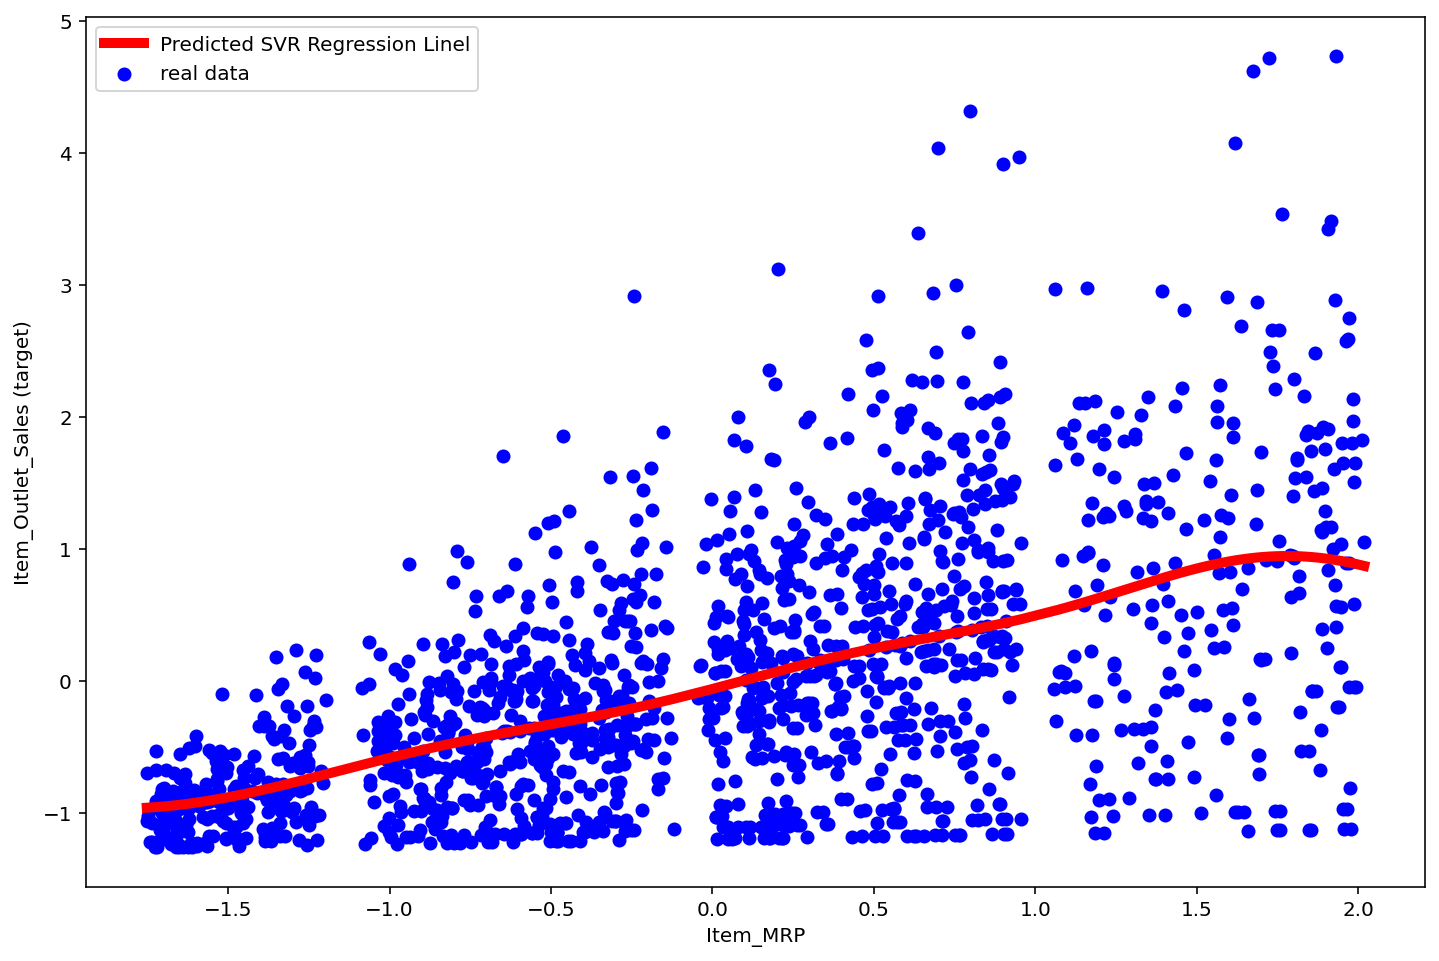

In [ ]:
fig = figure_size(12, 8)
plt.scatter(X_test, y_test,  color='blue', label='real data')
plt.plot(X_test, predicted_SVR, color='red', label='Predicted SVR Regression Linel', linewidth=5)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales (target)')
plt.legend()